## Importing Libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pointbiserialr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("CVD_cleaned.csv")

In [4]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


## Data Cleaning

In [77]:
data.shape

(308854, 19)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [79]:
data.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [80]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


### Missing Values

In [81]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

### Outliers

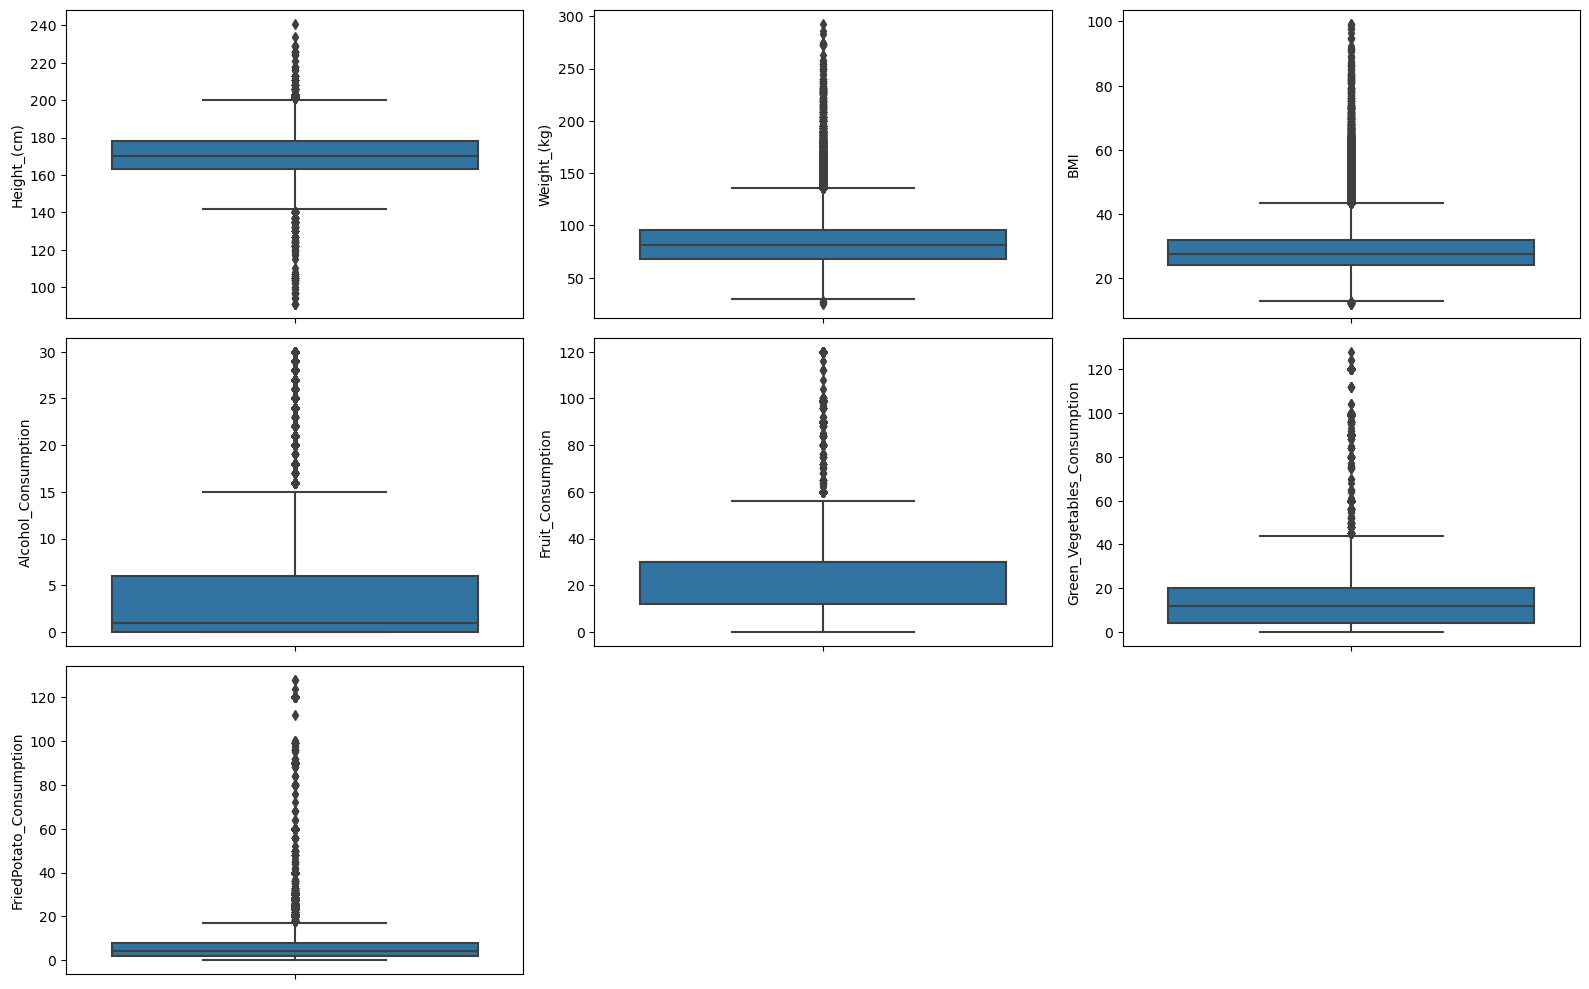

In [6]:
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']

plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])

plt.tight_layout()

In [7]:
summary_stats = data[numerical_cols].describe()
summary_stats

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


### Duplicates

In [8]:
duplicate_count = data.duplicated().sum()

print("Number of duplicates:", duplicate_count)

Number of duplicates: 80


In [83]:
data.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [85]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

## Univariate Analysis

### Numerical Variables

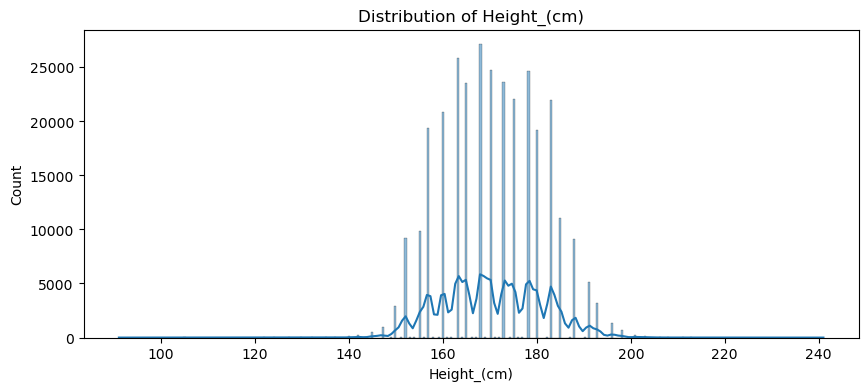

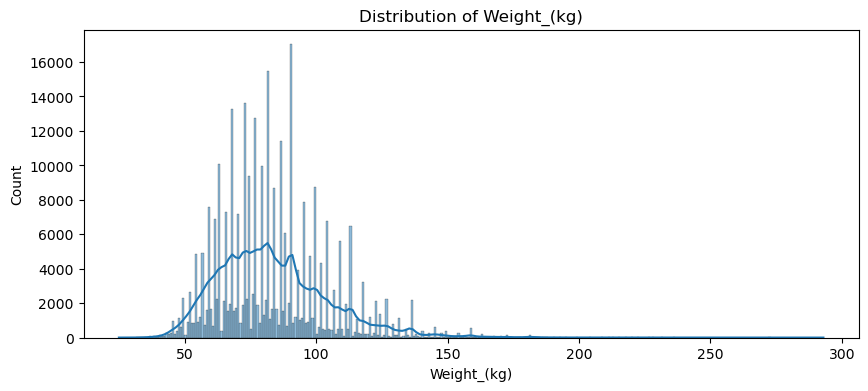

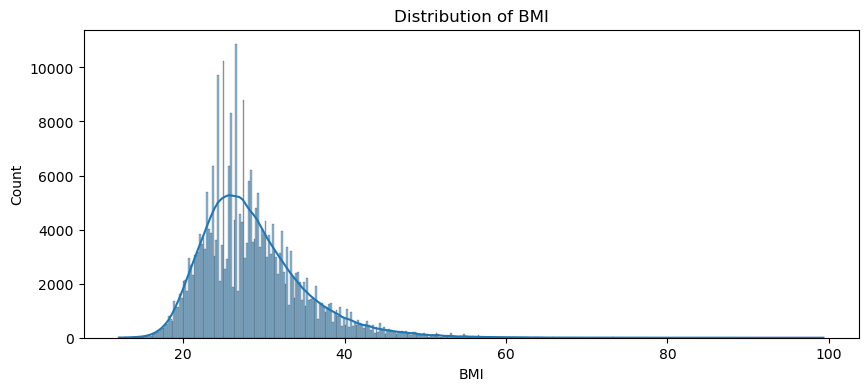

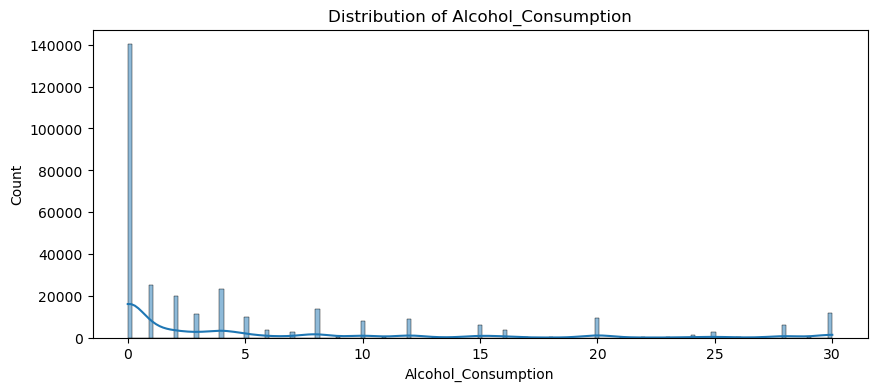

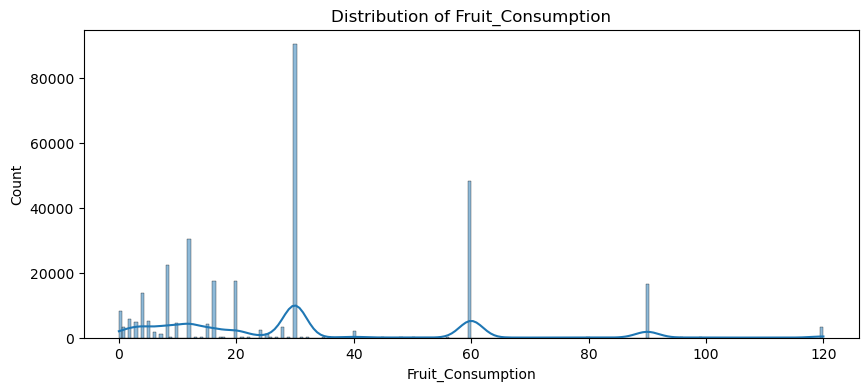

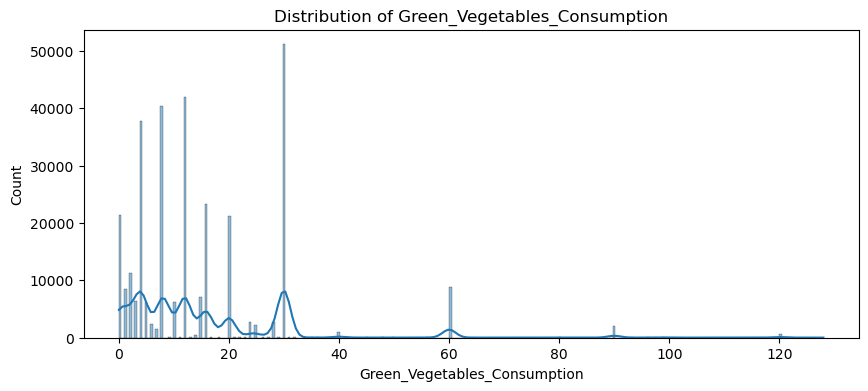

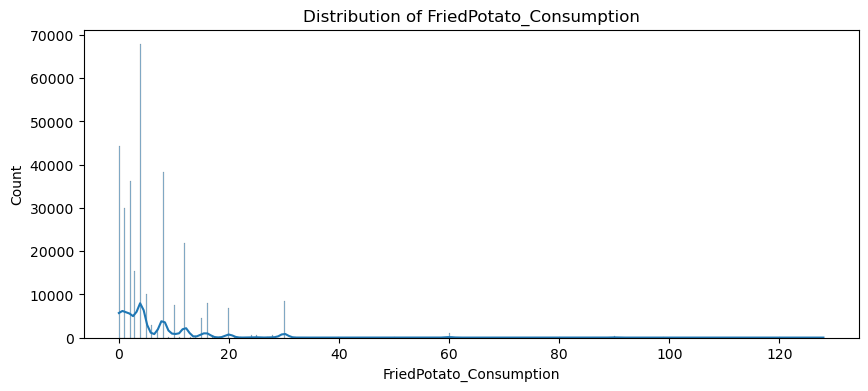

In [9]:
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                      'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

### Categorical Variables 

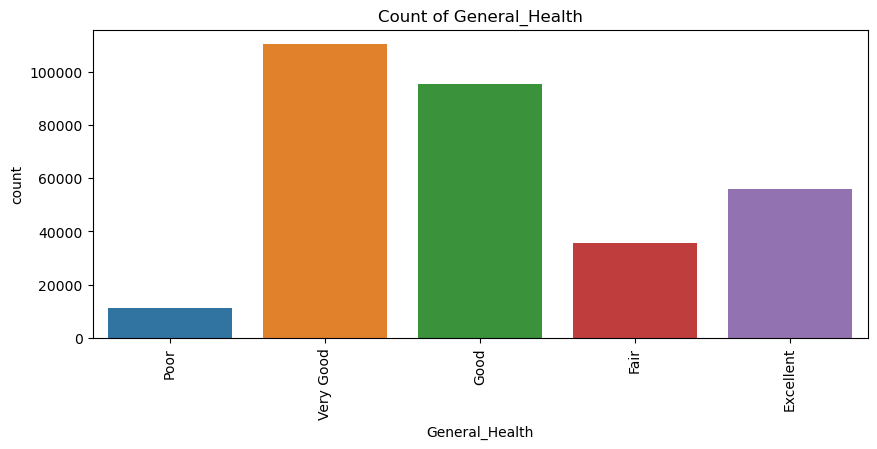

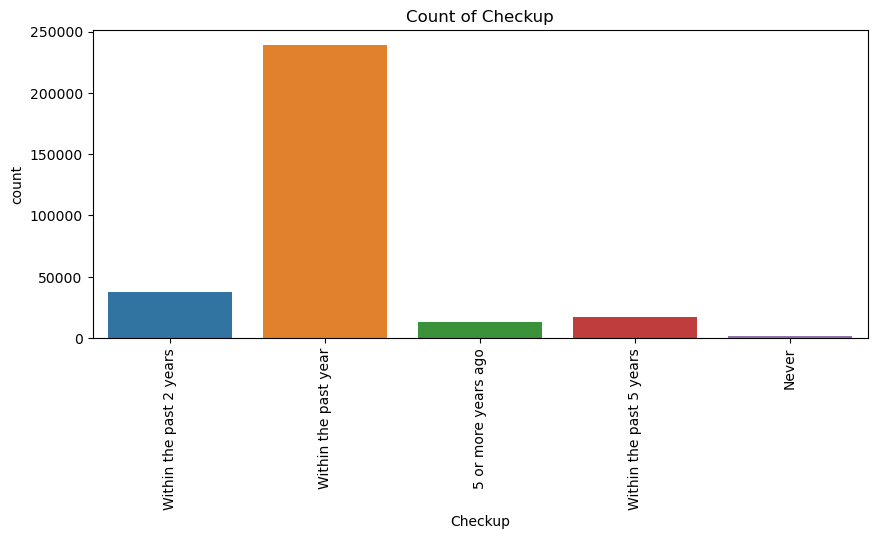

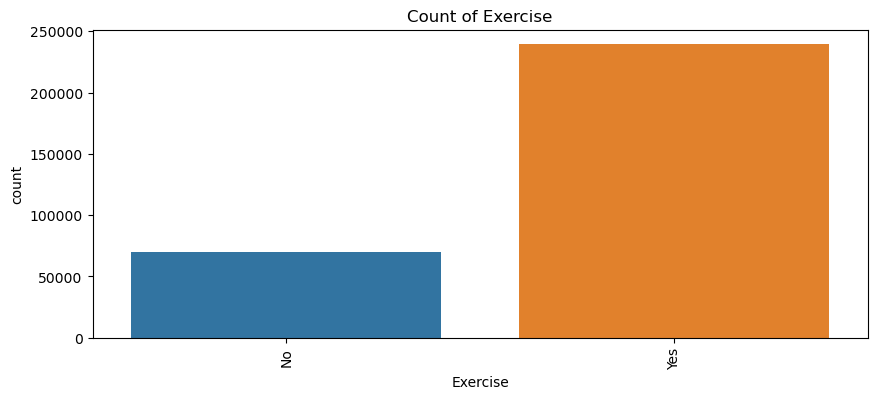

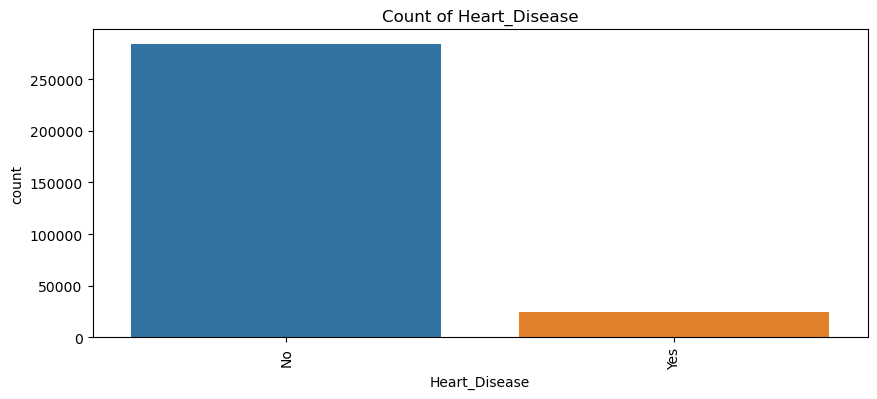

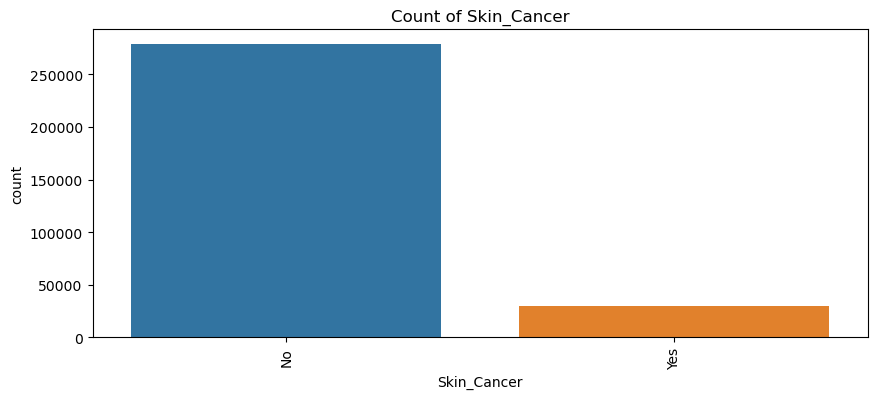

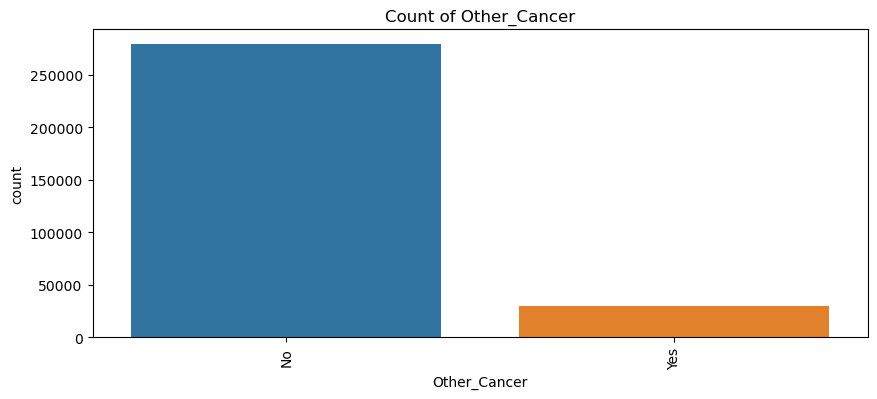

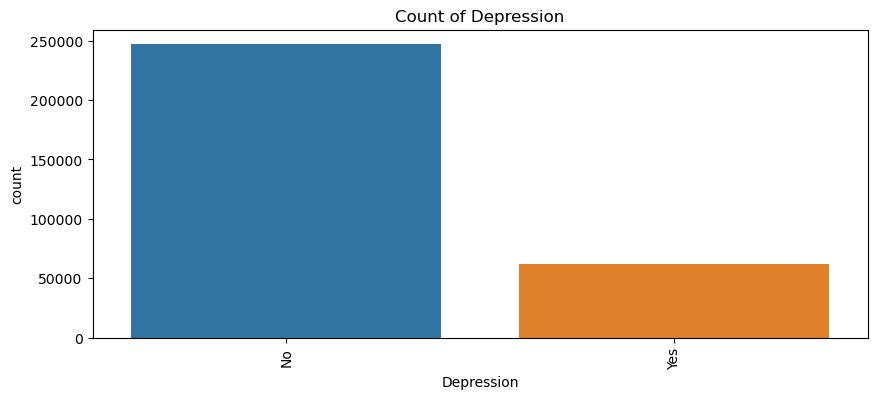

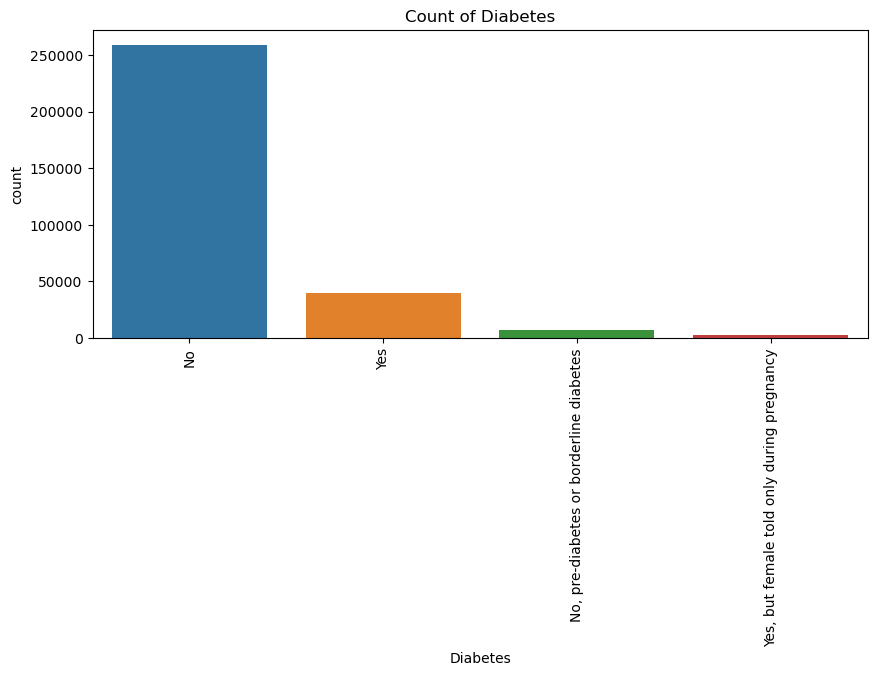

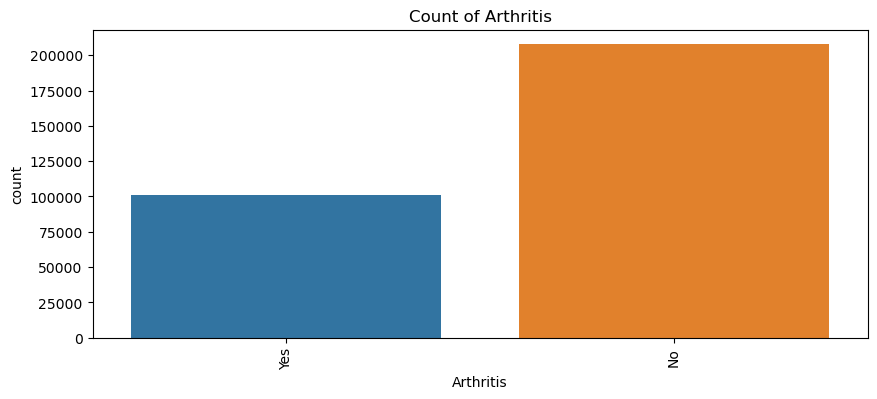

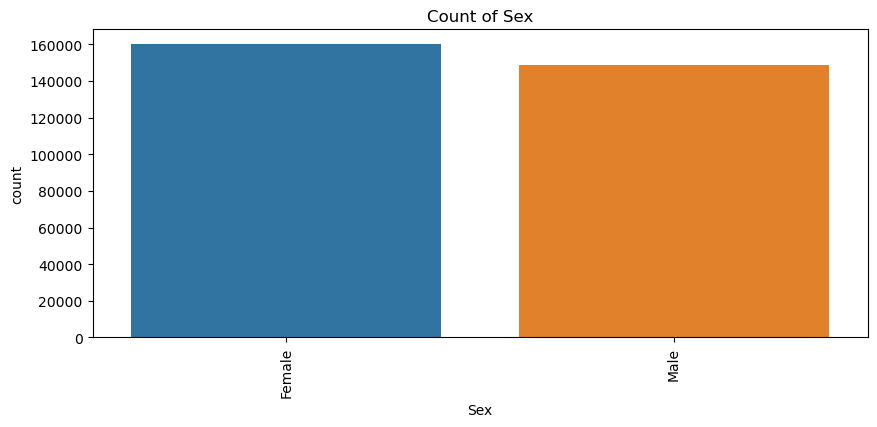

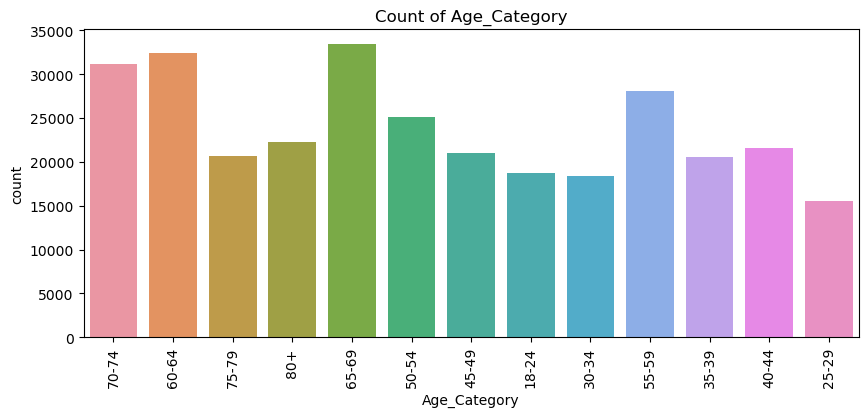

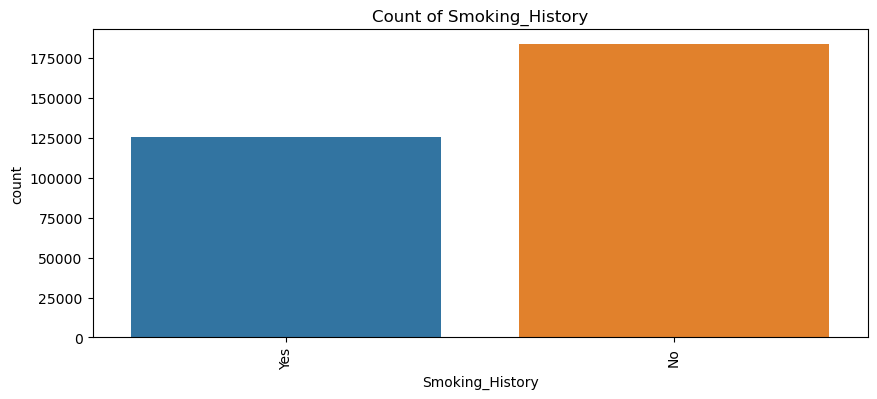

In [10]:
# Check the distribution of categorical features
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                        'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=feature)
    plt.title('Count of ' + feature)
    plt.xticks(rotation=90)
    plt.show()

## Bivariate Analysis

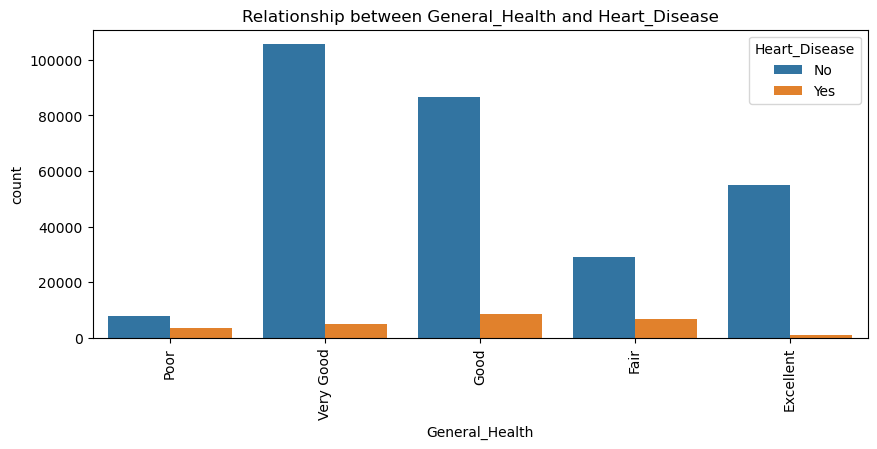

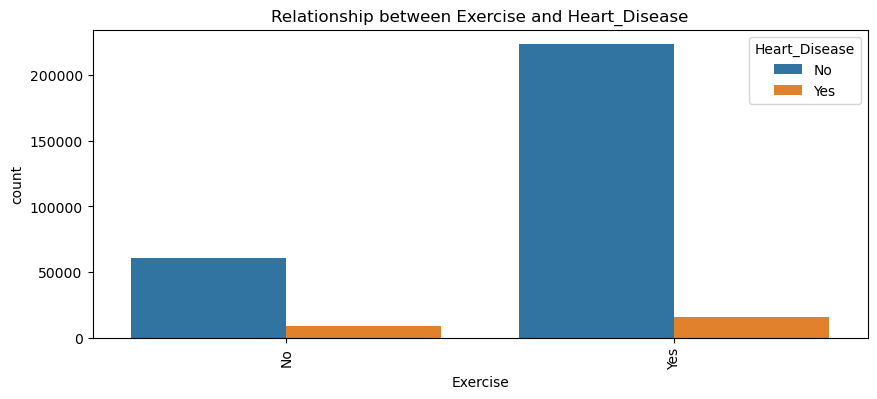

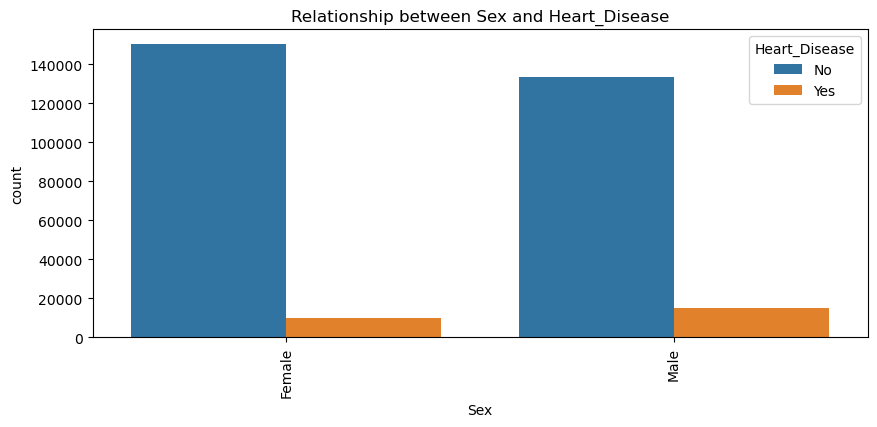

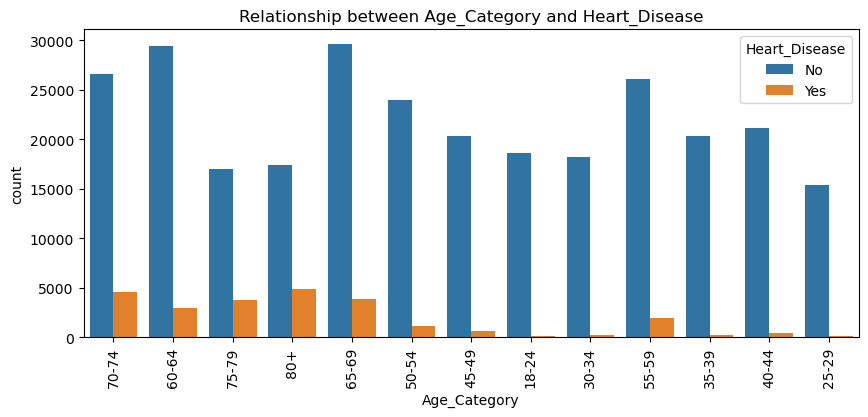

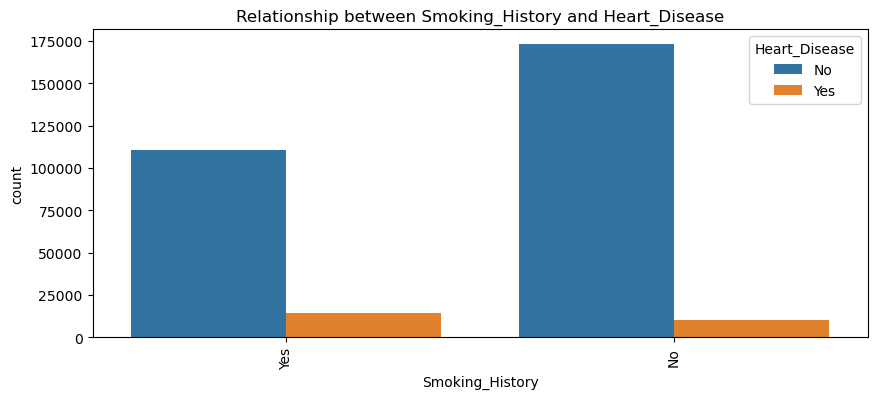

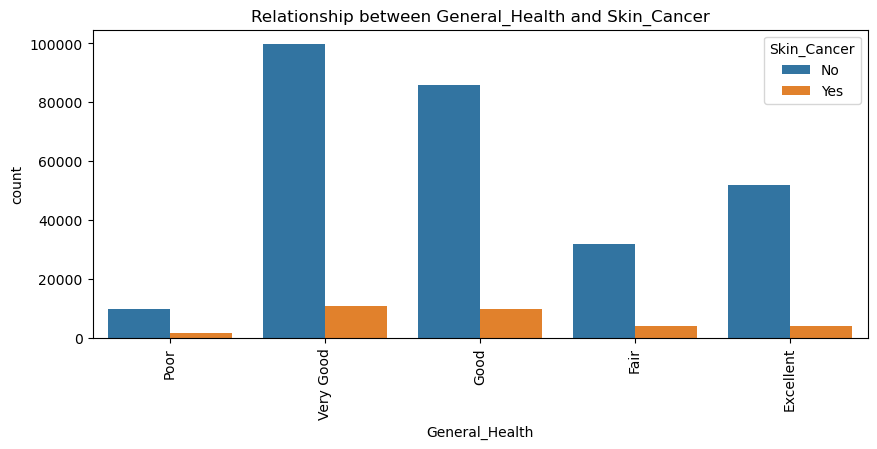

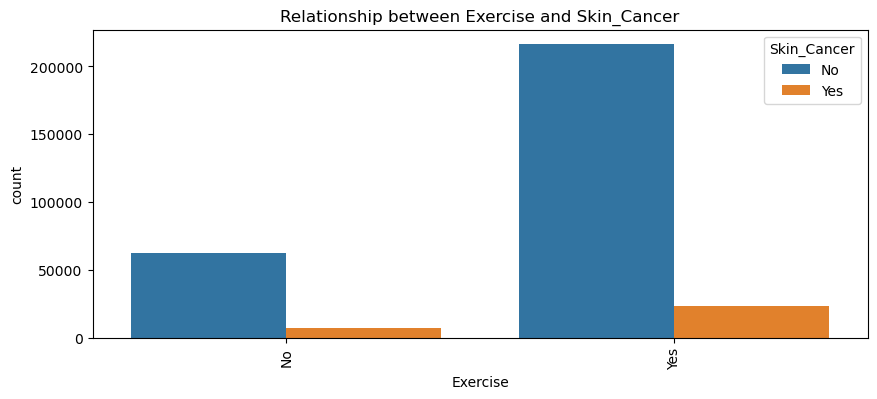

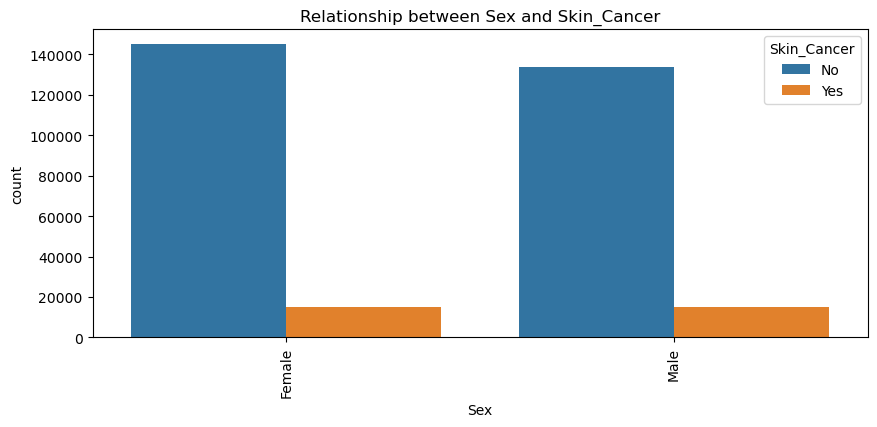

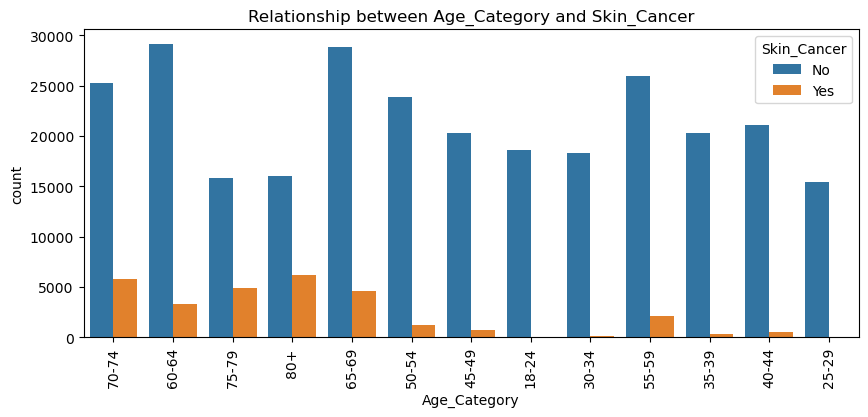

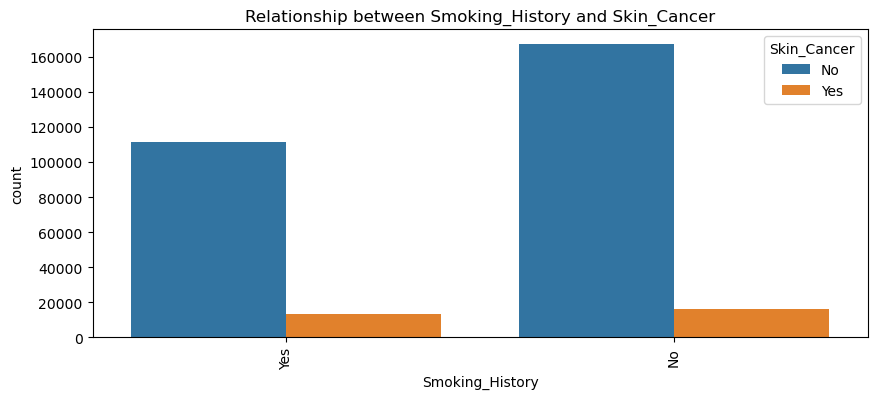

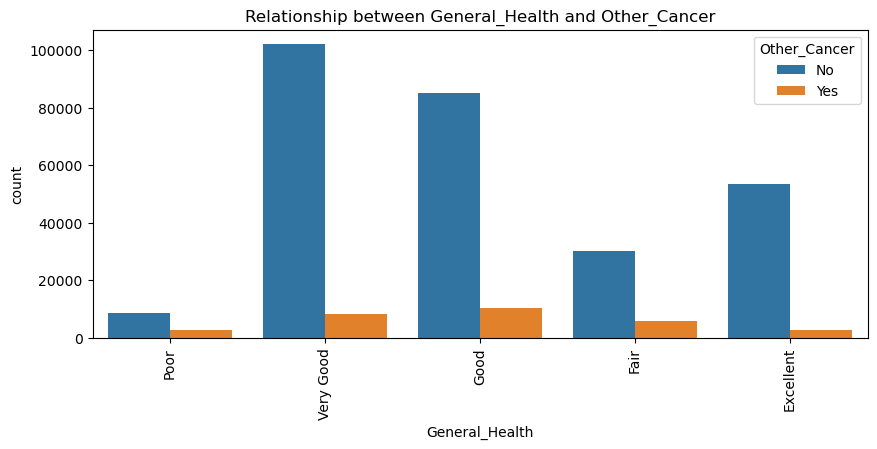

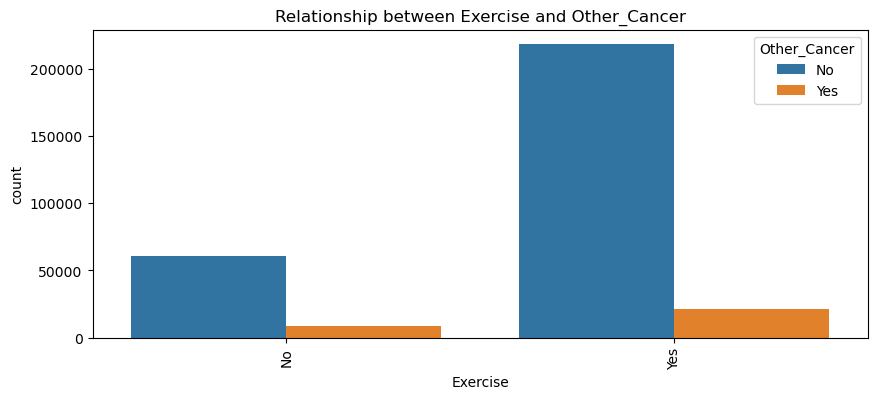

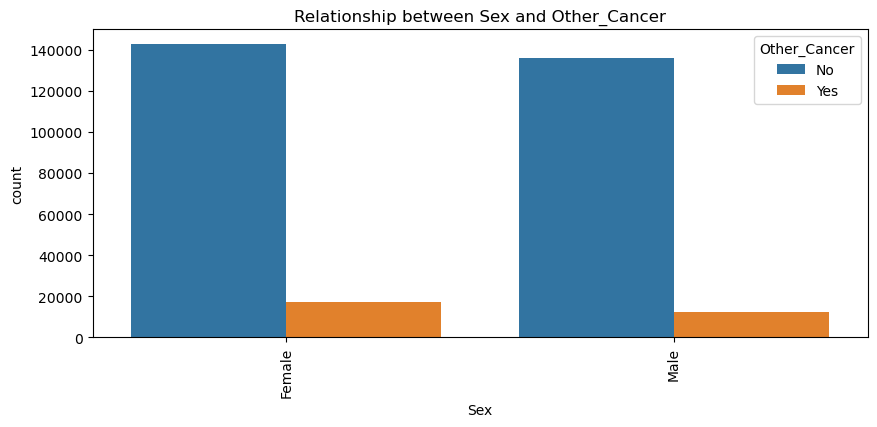

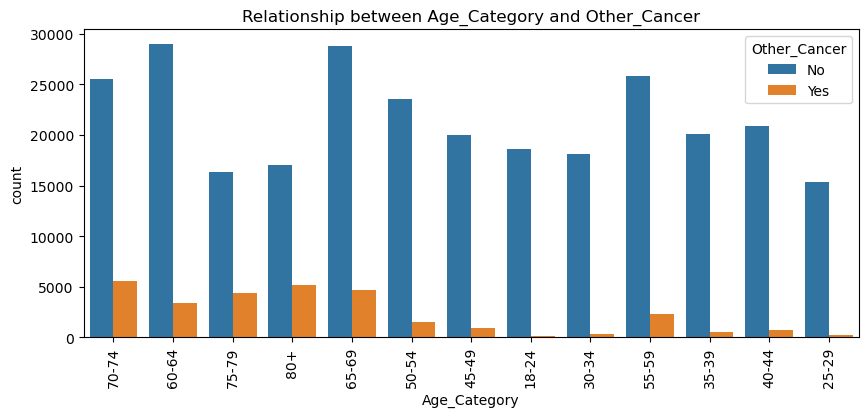

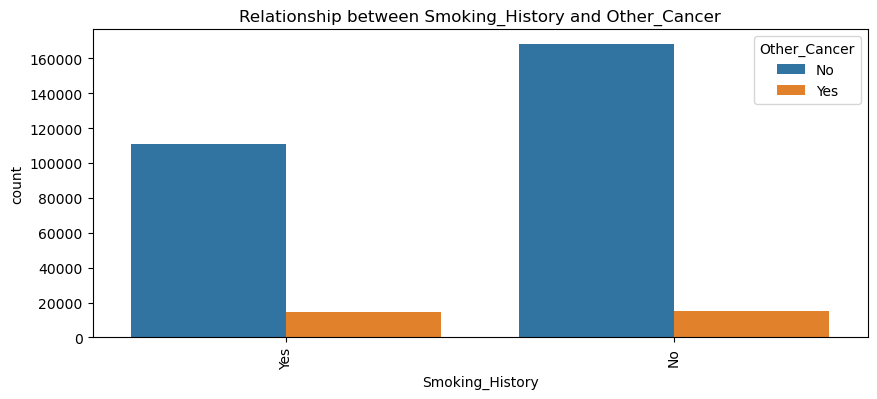

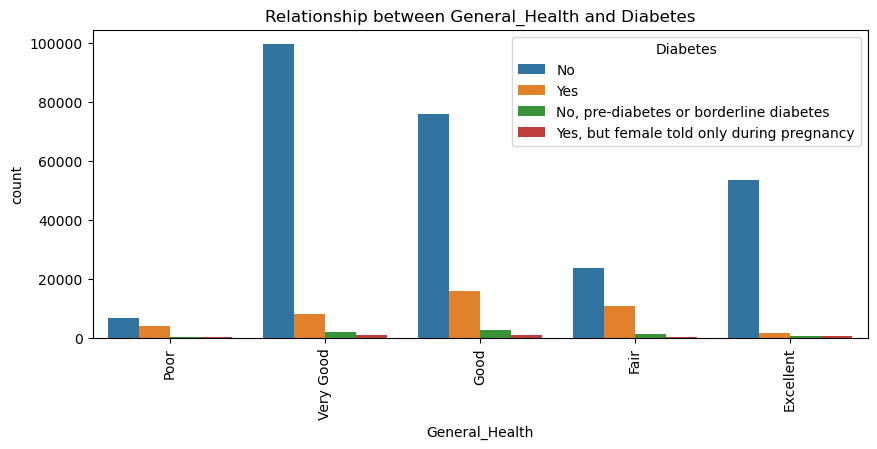

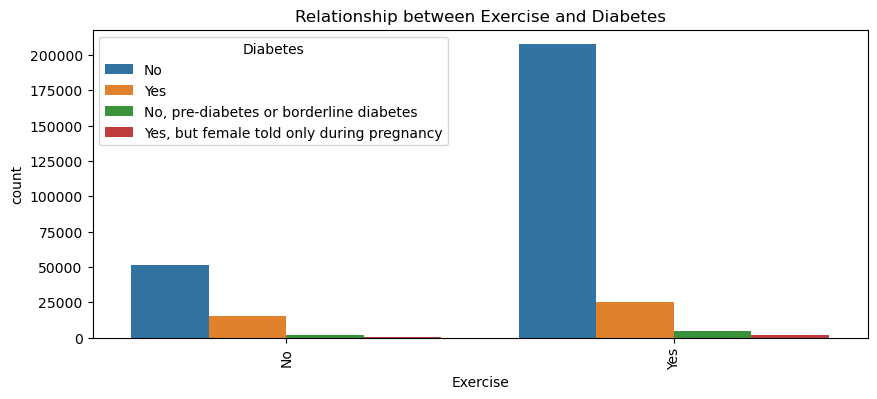

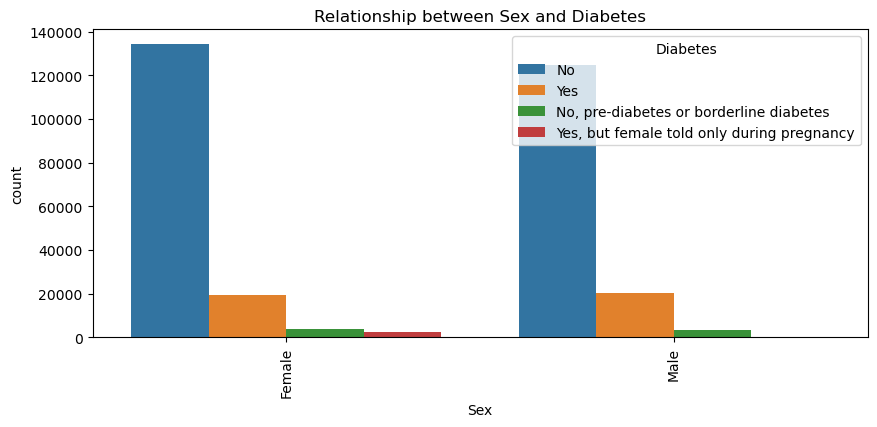

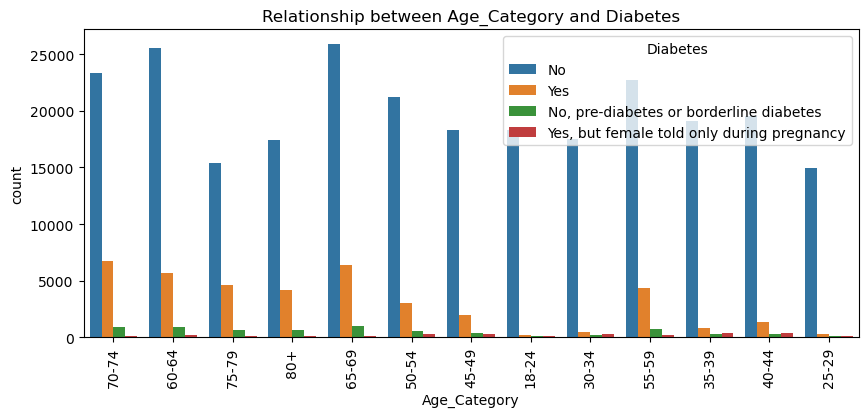

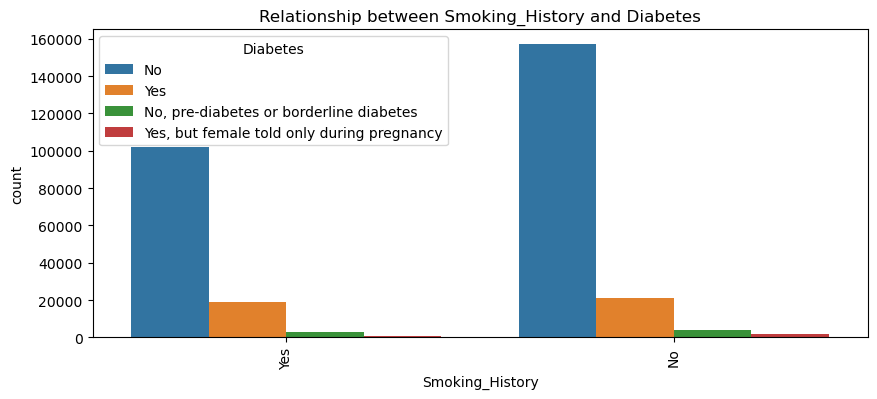

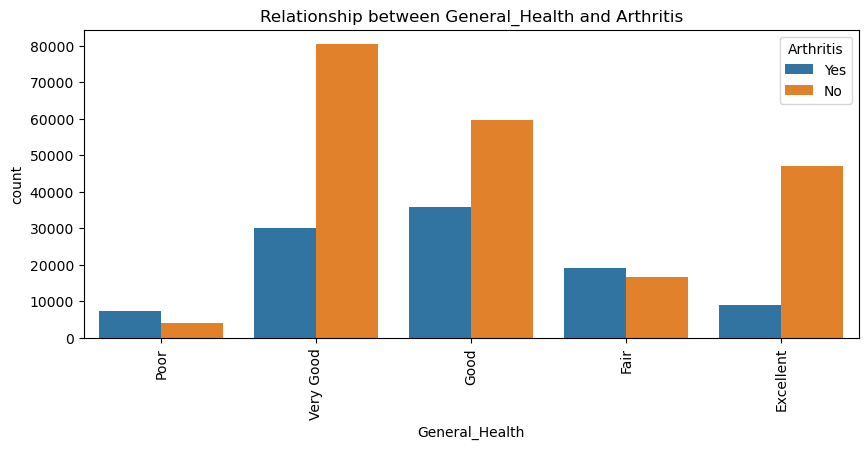

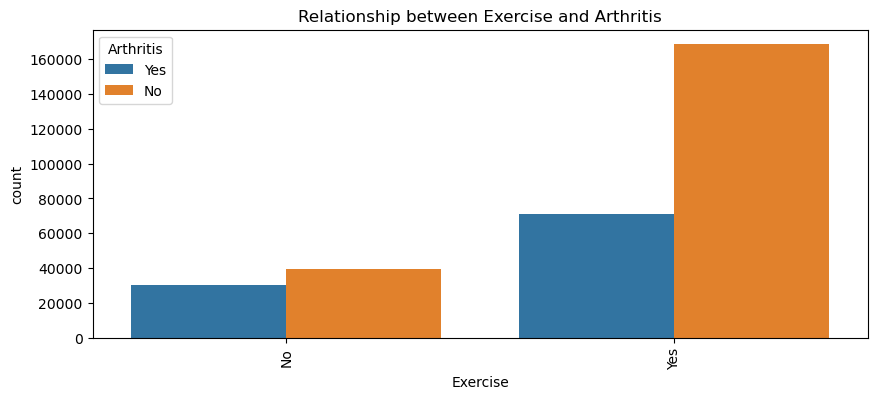

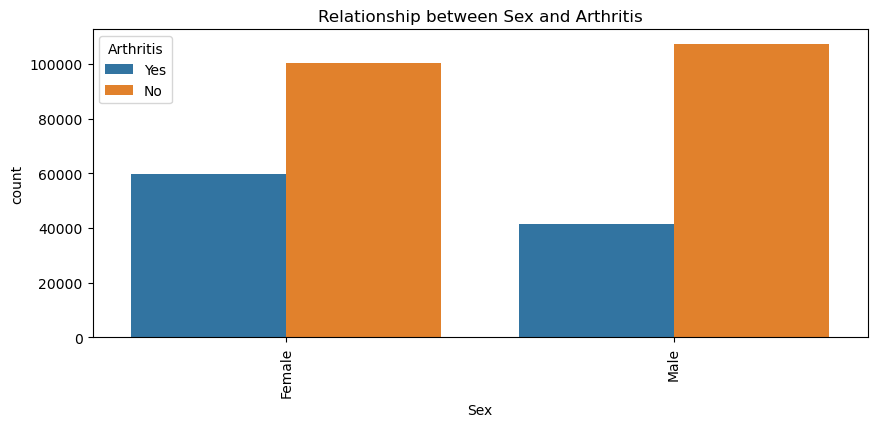

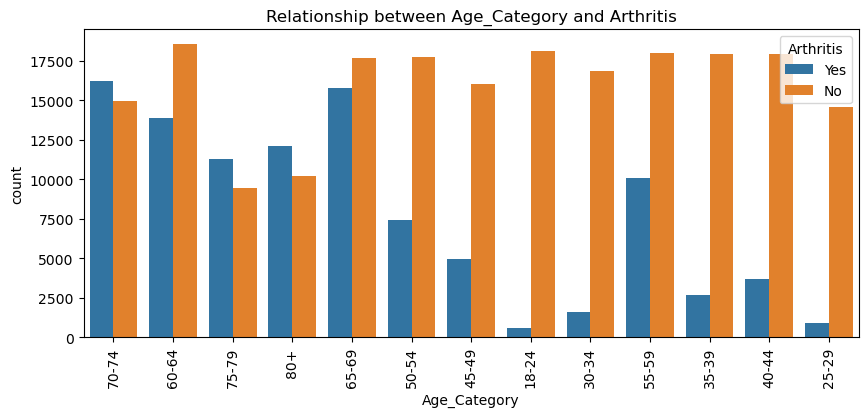

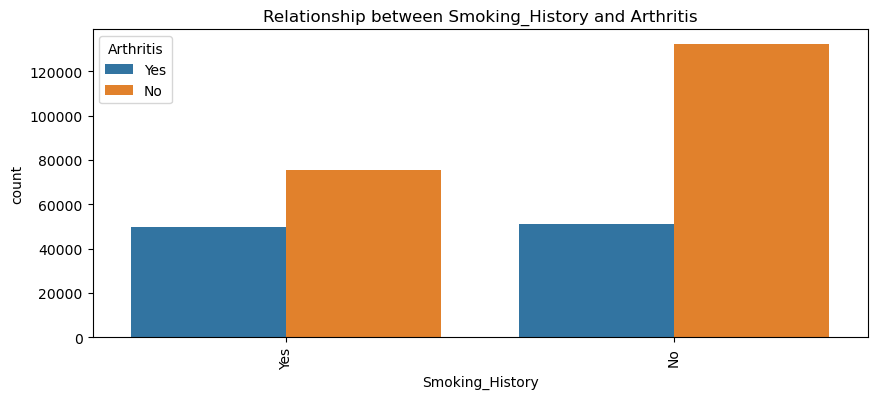

In [11]:
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=data, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

## Multivariate Analysis

### General Variables

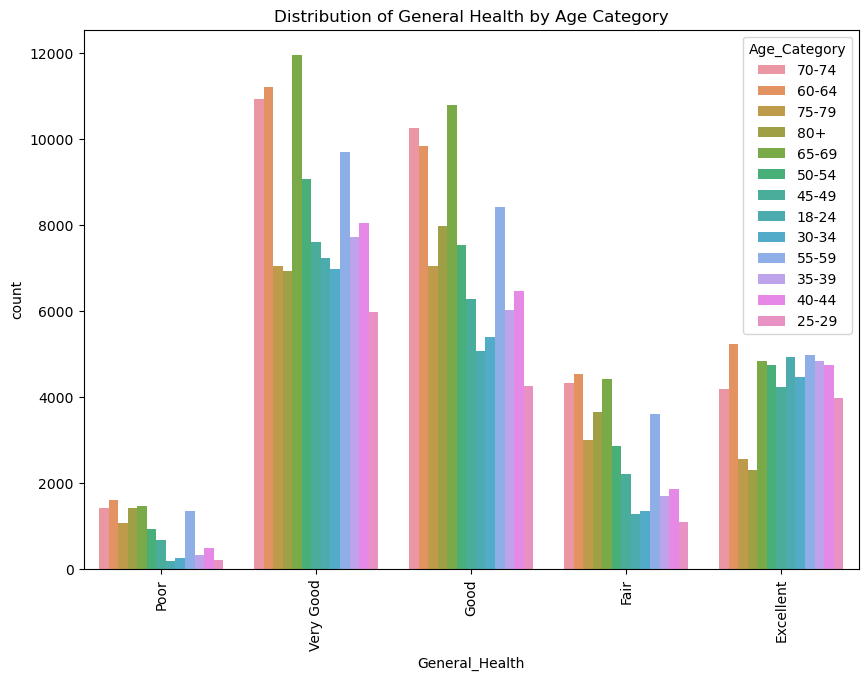

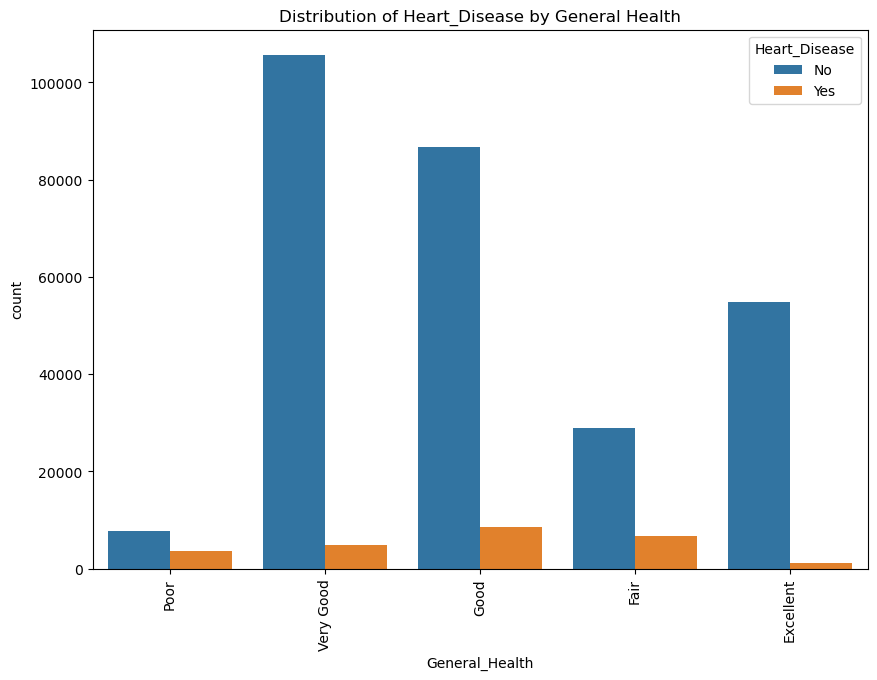

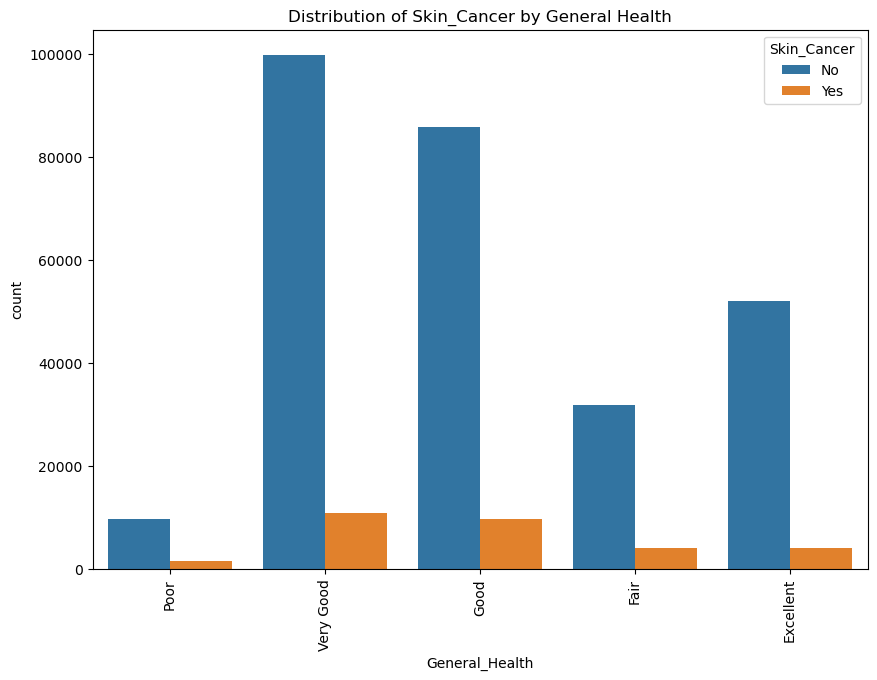

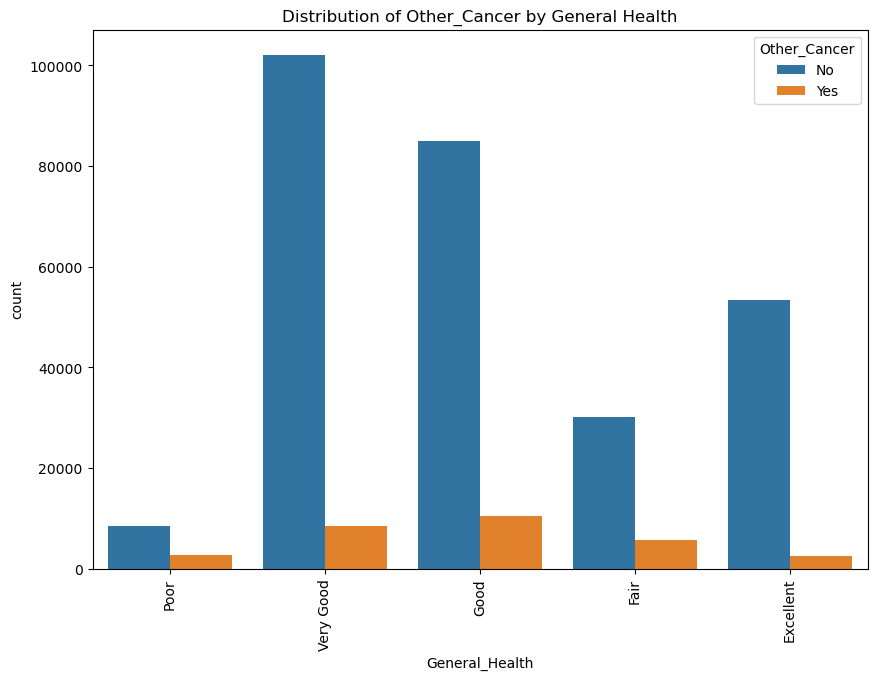

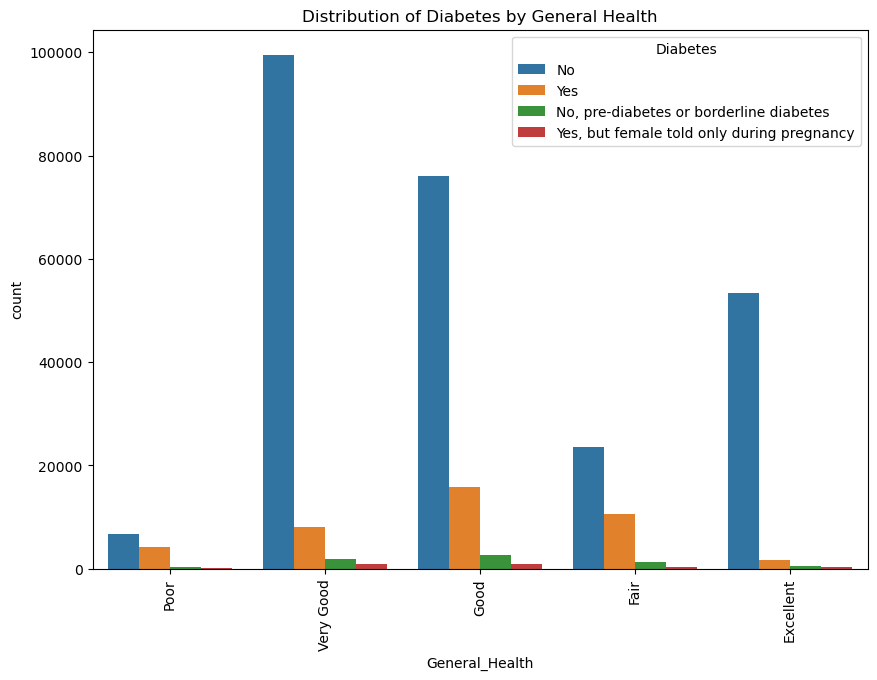

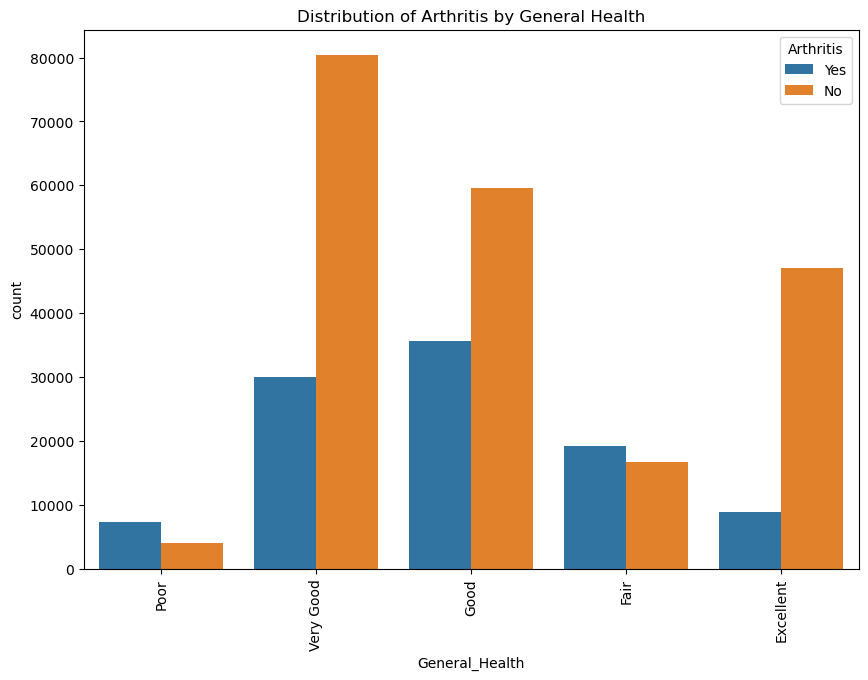

In [12]:
plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='General_Health', hue='Age_Category')
plt.title('Distribution of General Health by Age Category')
plt.xticks(rotation=90)
plt.show()

for disease in disease_conditions:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x='General_Health', hue=disease)
    plt.title('Distribution of ' + disease + ' by General Health')
    plt.xticks(rotation=90)
    plt.show()

### BMI Category

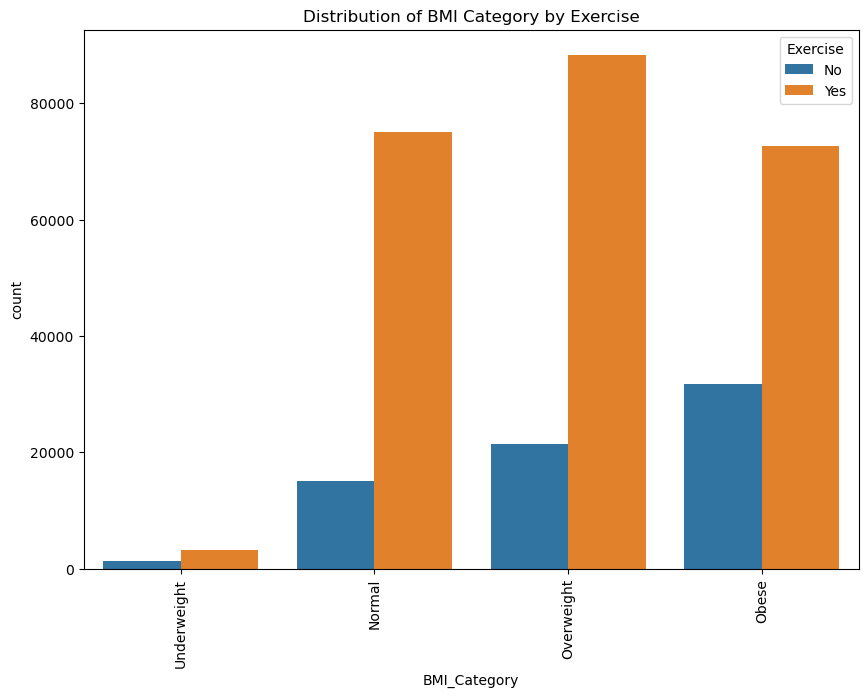

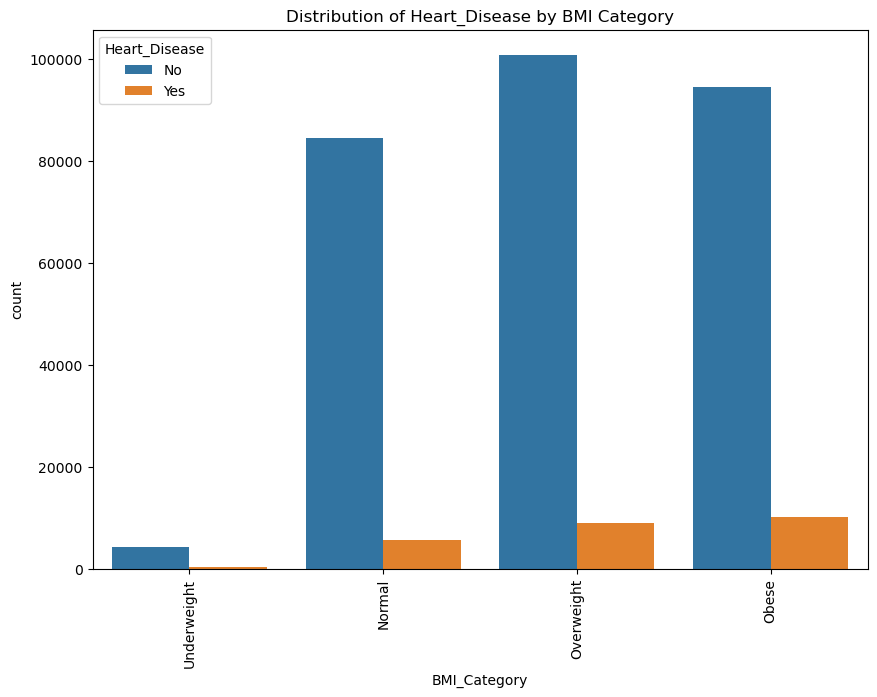

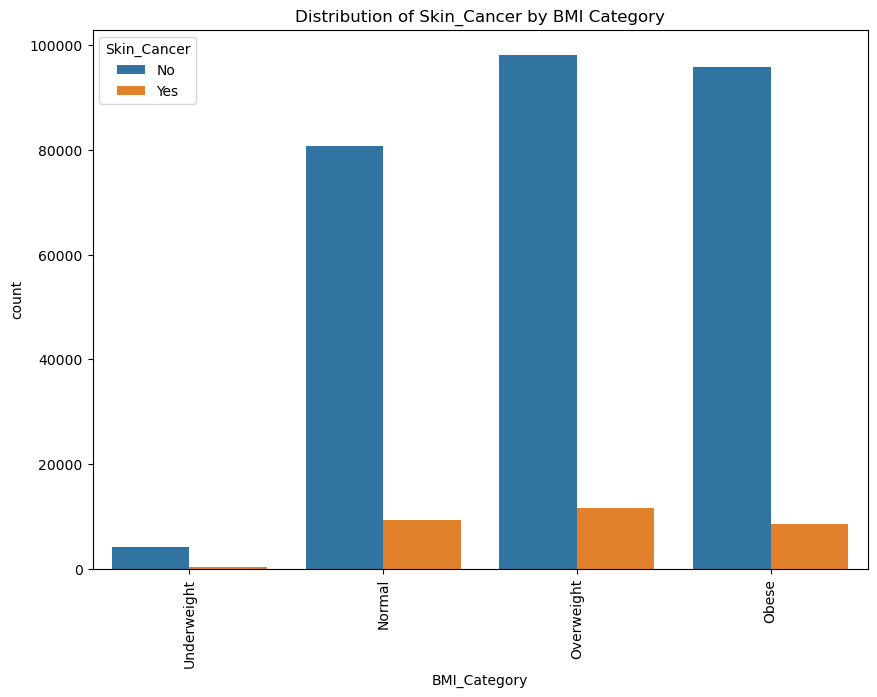

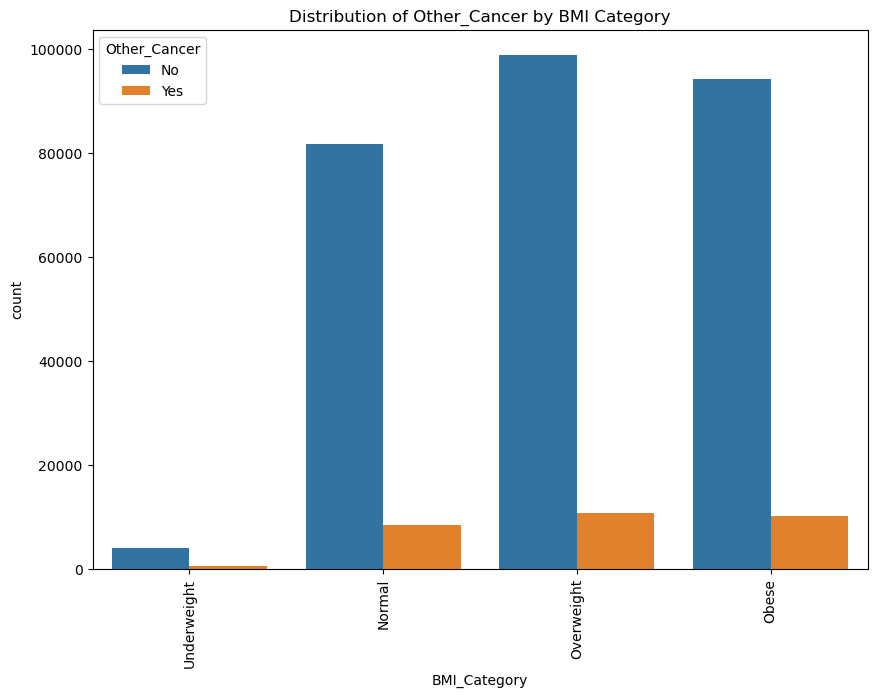

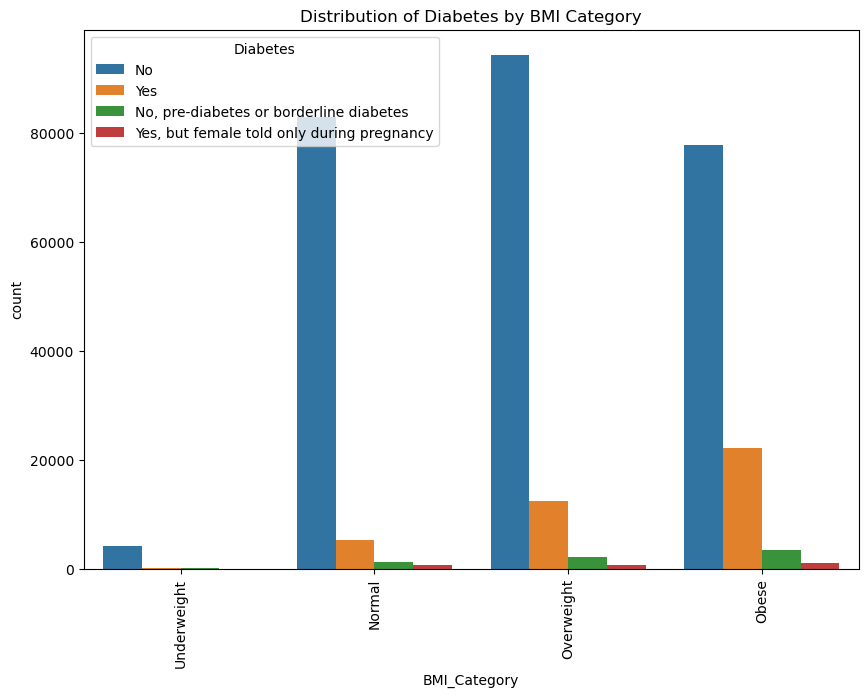

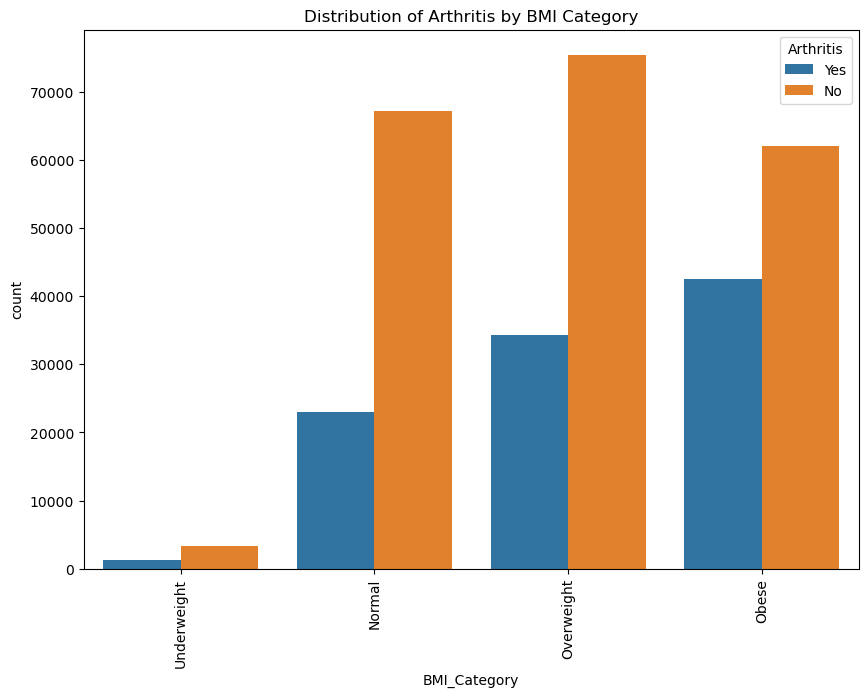

In [13]:
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0,18.5,25,30,100], labels=['Underweight','Normal',
                                                                            'Overweight','Obese'])

plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='BMI_Category', hue='Exercise')
plt.title('Distribution of BMI Category by Exercise')
plt.xticks(rotation=90)
plt.show()

for disease in disease_conditions:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x='BMI_Category', hue=disease)
    plt.title('Distribution of ' + disease + ' by BMI Category')
    plt.xticks(rotation=90)
    plt.show()

###  3D plot: Age_Category, General_Health, and BMI

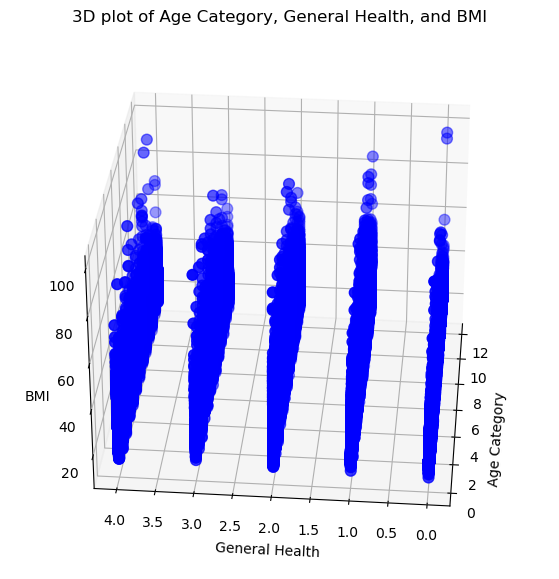

In [14]:
le = LabelEncoder()

data_3D = data[['Age_Category', 'General_Health', 'BMI']].copy()

data_3D['Age_Category'] = le.fit_transform(data_3D['Age_Category'])
data_3D['General_Health'] = le.fit_transform(data_3D['General_Health'])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3D['Age_Category'], data_3D['General_Health'], data_3D['BMI'], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age Category")
plt.ylabel("General Health")
ax.set_zlabel('BMI')
plt.title('3D plot of Age Category, General Health, and BMI')
plt.show()

### Correlation Matrix

#### Data Preprocessing

In [15]:
# Mapping for Diabetes
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

In [16]:
# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

In [17]:
# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 
                  'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

In [18]:
# Ordinal encoding for General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

In [19]:
checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)

In [20]:
age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

In [21]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,...,32.66,14.54,1,0.0,30.0,16.0,12.0,Underweight,1,0
1,3,4.0,0,1,0,0,0,1,0,10,...,77.11,28.29,0,0.0,30.0,0.0,4.0,Overweight,1,0
2,3,4.0,1,0,0,0,0,1,0,8,...,88.45,33.47,0,4.0,12.0,3.0,16.0,Obese,1,0
3,0,4.0,1,1,0,0,0,1,0,11,...,93.44,28.73,0,0.0,30.0,30.0,8.0,Overweight,0,1
4,2,4.0,0,0,0,0,0,0,0,12,...,88.45,24.37,1,0.0,8.0,4.0,0.0,Normal,0,1


In [22]:
data.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,...,32.66,14.54,1,0.0,30.0,16.0,12.0,Underweight,1,0
1,3,4.0,0,1,0,0,0,1,0,10,...,77.11,28.29,0,0.0,30.0,0.0,4.0,Overweight,1,0
2,3,4.0,1,0,0,0,0,1,0,8,...,88.45,33.47,0,4.0,12.0,3.0,16.0,Obese,1,0
3,0,4.0,1,1,0,0,0,1,0,11,...,93.44,28.73,0,0.0,30.0,30.0,8.0,Overweight,0,1
4,2,4.0,0,0,0,0,0,0,0,12,...,88.45,24.37,1,0.0,8.0,4.0,0.0,Normal,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3,4.0,1,0,0,0,0,0,0,1,...,81.65,29.05,0,4.0,30.0,8.0,0.0,Overweight,0,1
308850,1,1.0,1,0,0,0,0,1,0,9,...,69.85,21.48,0,8.0,15.0,60.0,4.0,Normal,0,1
308851,3,0.2,1,0,0,0,1,1,0,2,...,61.23,24.69,1,4.0,40.0,8.0,4.0,Normal,1,0
308852,3,4.0,1,0,0,0,0,0,0,9,...,79.38,23.73,0,3.0,30.0,12.0,0.0,Normal,0,1


### Correlation Matrix

In [24]:
corr = data.corr()

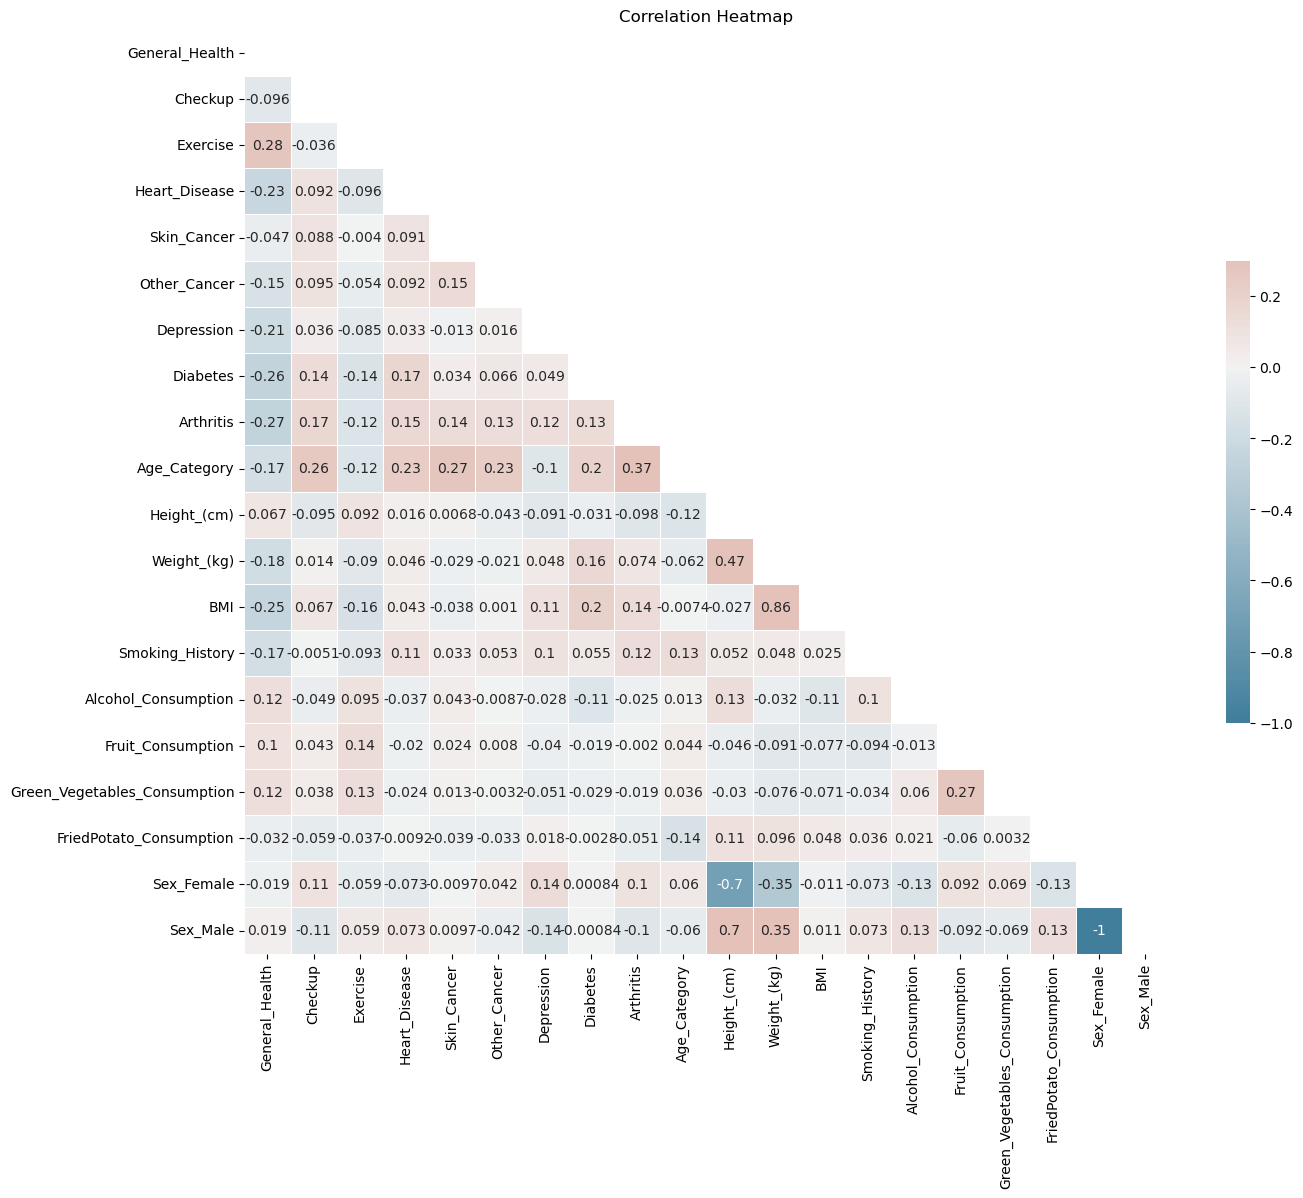

In [23]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

### Correlation of each feature with the disease variables

In [25]:
disease_variables = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']
corr = data.corr()

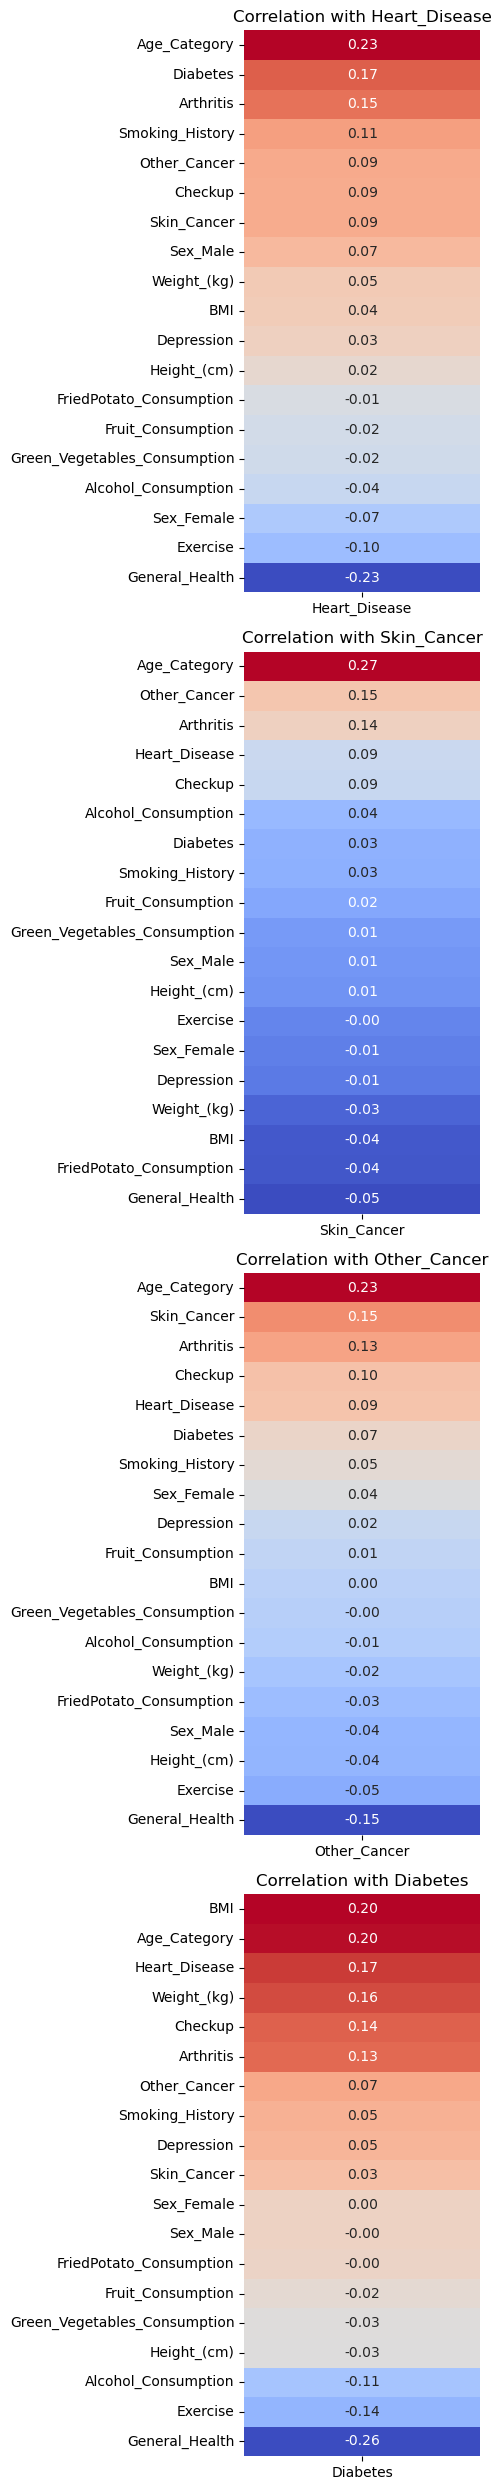

In [26]:
fig, axs = plt.subplots(len(disease_variables), 1, figsize=(5, 25))

for ax, disease in zip(axs, disease_variables):
    # Compute the correlation with the disease
    target_corr = corr[disease].drop(disease)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Plot a heatmap of the correlations with the disease
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()

## Questions for Analysis

### Question1. What is the distribution of general health status in the dataset?

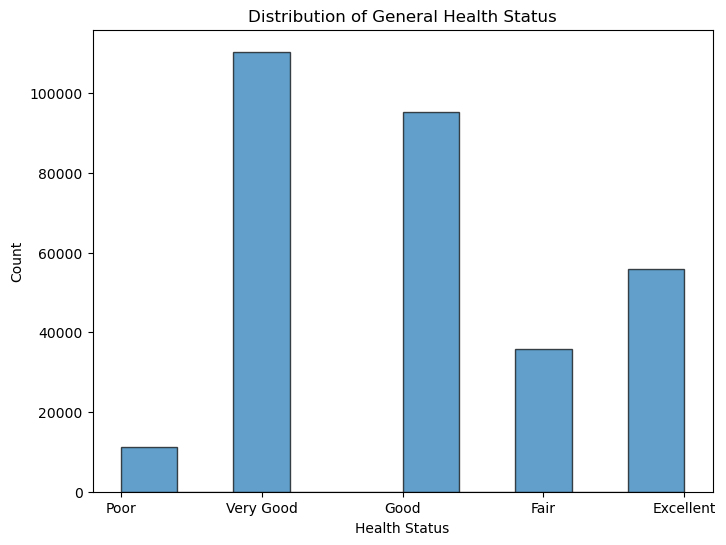

In [99]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data.General_Health, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of General Health Status')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()

### Question2.	How often do people in the dataset get checkup?

In [100]:
data.Checkup.value_counts()

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

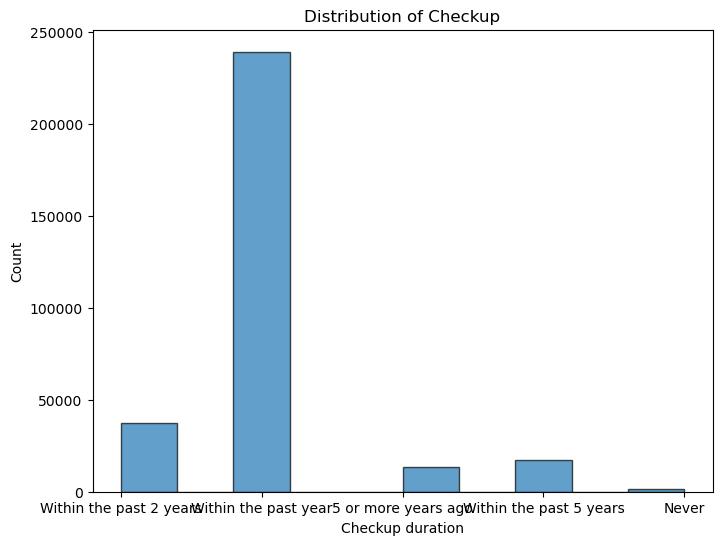

In [101]:
plt.figure(figsize=(8, 6))
plt.hist(data.Checkup, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Checkup')
plt.xlabel('Checkup duration')
plt.ylabel('Count')
plt.show()

### Question3.	What percentage of people in the dataset exercise regularly?

In [102]:
exercise_count = data.Exercise.value_counts()
(exercise_count[0] / len(data)) * 100

77.506200340614

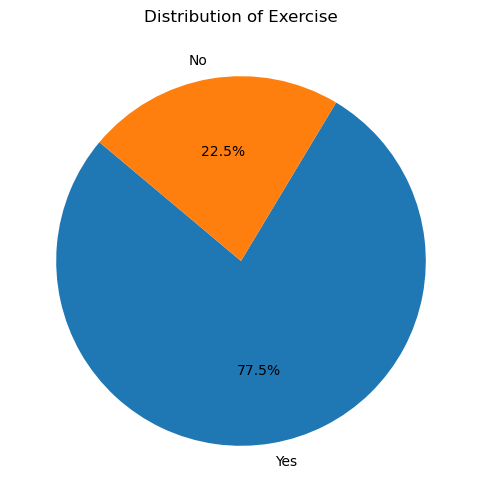

In [103]:
# Get labels and counts for the pie chart
labels = data.Exercise.value_counts().index
counts = data.Exercise.value_counts().values

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Exercise')
plt.show()

### Question4.	How many people in the dataset have heart disease?

In [104]:
heart_disease_count = data.Heart_Disease.value_counts()
(heart_disease_count[0] / len(data)) * 100

91.91495010587528

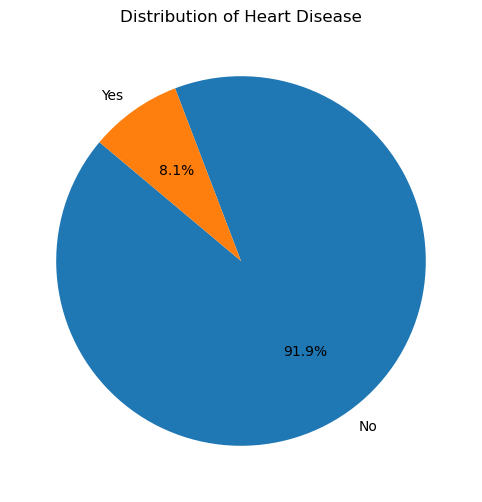

In [105]:
# Get labels and counts for the pie chart
labels = data.Heart_Disease.value_counts().index
counts = data.Heart_Disease.value_counts().values

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Heart Disease')
plt.show()

### Question5.	How many people in the dataset have skin cancer?

In [106]:
data.Skin_Cancer.value_counts()

No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64

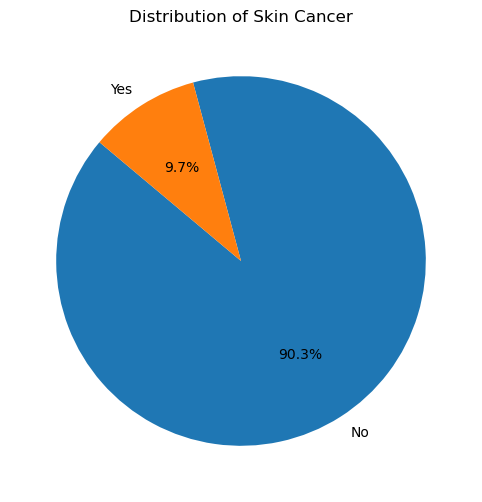

In [107]:
# Get labels and counts for the pie chart
labels = data.Skin_Cancer.value_counts().index
counts = data.Skin_Cancer.value_counts().values

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Skin Cancer')
plt.show()

### Question6.	How many people in the dataset have other types of cancer?

In [108]:
data.Other_Cancer.value_counts()

No     278976
Yes     29878
Name: Other_Cancer, dtype: int64

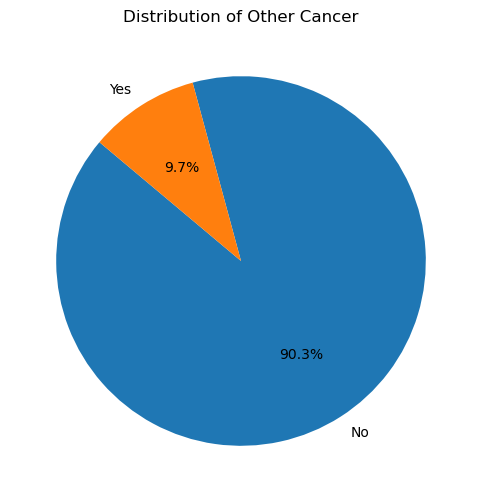

In [109]:
# Get labels and counts for the pie chart
labels = data.Other_Cancer.value_counts().index
counts = data.Other_Cancer.value_counts().values

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Other Cancer')
plt.show()

### Question7.	What percentage of people in the dataset have depression?

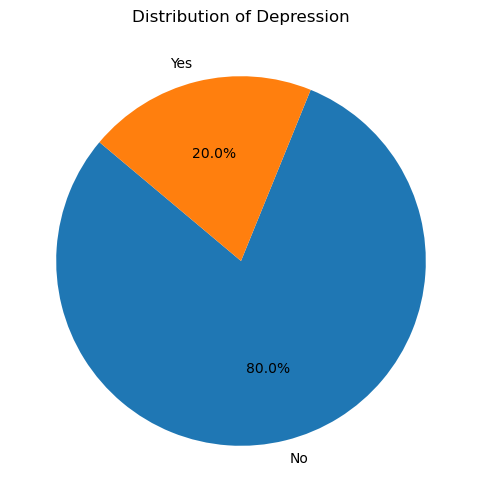

In [110]:
labels = data.Depression.value_counts().index
counts = data.Depression.value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Depression')
plt.show()

### Question8.	How many people in the dataset have diabetes?

In [111]:
data.Diabetes.value_counts()

No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64

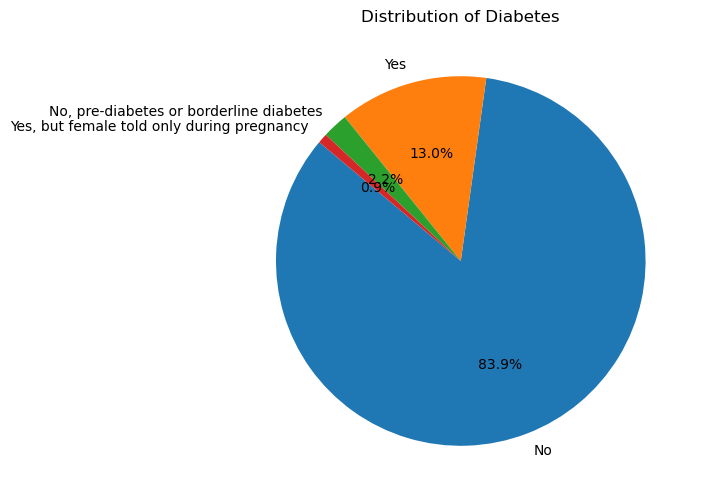

In [112]:
labels = data.Diabetes.value_counts().index
counts = data.Diabetes.value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diabetes')
plt.show()

### Question9.	How many people in the dataset have arthritis?

In [113]:
data.Arthritis.value_counts()

No     207783
Yes    101071
Name: Arthritis, dtype: int64

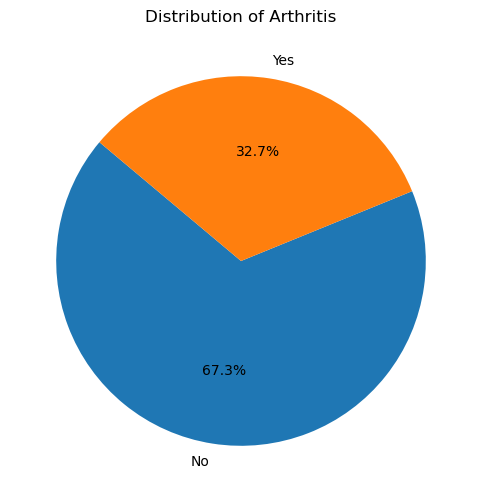

In [114]:
labels = data.Arthritis.value_counts().index
counts = data.Arthritis.value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Arthritis')
plt.show()

### Question10. 	What is the gender distribution in the dataset?

In [115]:
data.Sex.value_counts()

Female    160196
Male      148658
Name: Sex, dtype: int64

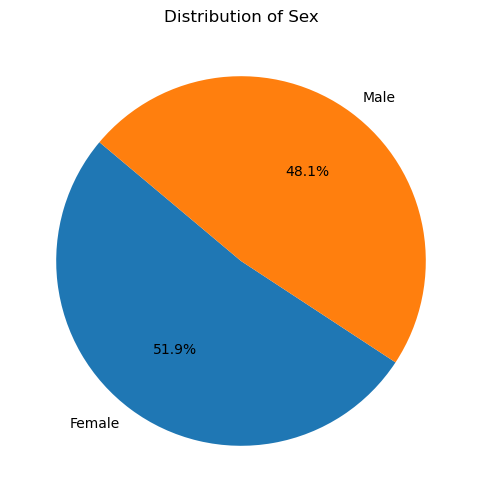

In [116]:
labels = data.Sex.value_counts().index
counts = data.Sex.value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex')
plt.show()

### Question11.	What is the age range of people in the dataset?

In [117]:
data.Age_Category.value_counts().index

Index(['65-69', '60-64', '70-74', '55-59', '50-54', '80+', '40-44', '45-49',
       '75-79', '35-39', '18-24', '30-34', '25-29'],
      dtype='object')

In [118]:
data.Age_Category.max()

'80+'

In [119]:
data.Age_Category.min()

'18-24'

### Question12.	What is the average height of people in the dataset?

In [120]:
data['Height_(cm)'].mean()

170.61524862880196

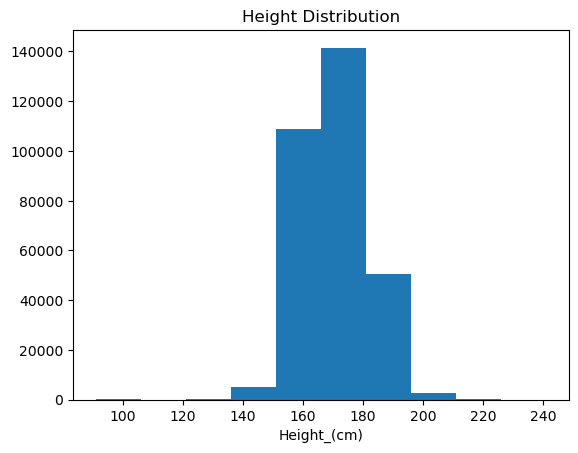

In [121]:
plt.hist(data['Height_(cm)'])

# Set the title and x-axis label
plt.title("Height Distribution")
plt.xlabel("Height_(cm)")

# Show the plot
plt.show()

### Question13.	What is the average weight of people in the dataset?

In [122]:
data['Weight_(kg)'].mean()

83.58865454227563

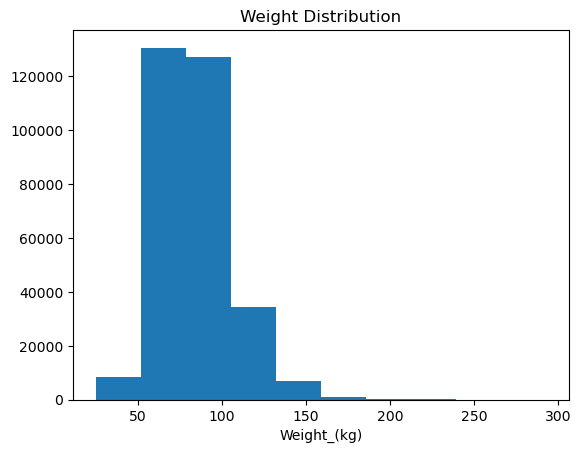

In [123]:
plt.hist(data['Weight_(kg)'])

# Set the title and x-axis label
plt.title("Weight Distribution")
plt.xlabel("Weight_(kg)")

# Show the plot
plt.show()

### Question14.	What is the average BMI of people in the dataset?

In [124]:
data.BMI.mean()

28.62621053960772

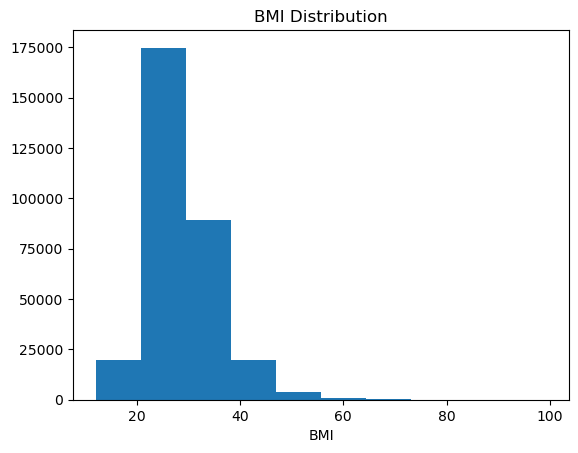

In [125]:
plt.hist(data['BMI'])

# Set the title and x-axis label
plt.title("BMI Distribution")
plt.xlabel("BMI")

# Show the plot
plt.show()

### Question15.	How many people in the dataset have a history of smoking?

In [128]:
data.Smoking_History.value_counts()

No     183590
Yes    125264
Name: Smoking_History, dtype: int64

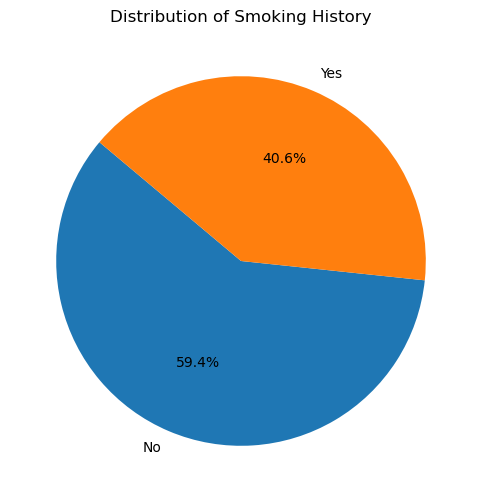

In [129]:
labels = data.Smoking_History.value_counts().index
counts = data.Smoking_History.value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Smoking History')
plt.show()

### Question16.	What is the average alcohol consumption in the dataset?

In [137]:
data.Alcohol_Consumption.mean()

5.096365920467276

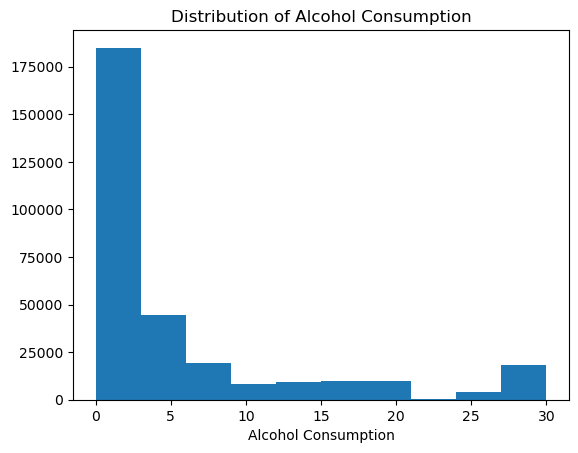

In [132]:
plt.hist(data['Alcohol_Consumption'])

# Set the title and x-axis label
plt.title("Distribution of Alcohol Consumption")
plt.xlabel("Alcohol Consumption")

# Show the plot
plt.show()

### Question17.	What is the average fruit consumption in the dataset?

In [133]:
data.Fruit_Consumption.mean()

29.835200450698387

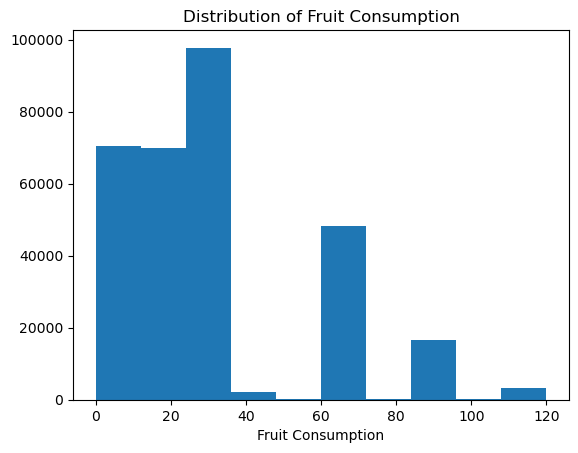

In [134]:
plt.hist(data['Fruit_Consumption'])

# Set the title and x-axis label
plt.title("Distribution of Fruit Consumption")
plt.xlabel("Fruit Consumption")

# Show the plot
plt.show()

### Question18.	What is the average green vegetable consumption in the dataset?

In [138]:
data.Green_Vegetables_Consumption.mean()

15.110440531772294

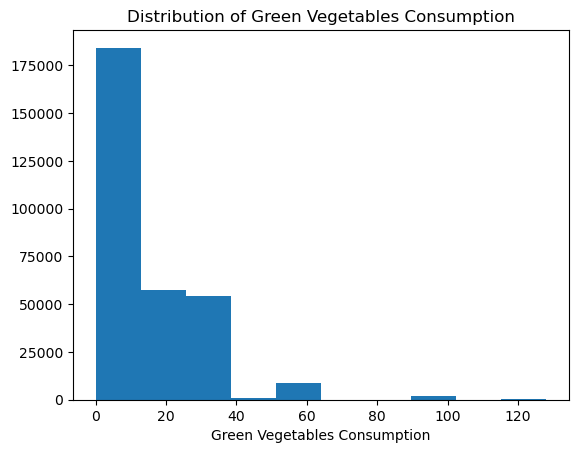

In [139]:
plt.hist(data['Green_Vegetables_Consumption'])

# Set the title and x-axis label
plt.title("Distribution of Green Vegetables Consumption")
plt.xlabel("Green Vegetables Consumption")

# Show the plot
plt.show()

### Question19.	What is the average fried potato consumption in the dataset?

In [140]:
data.FriedPotato_Consumption.mean()

6.296615876757302

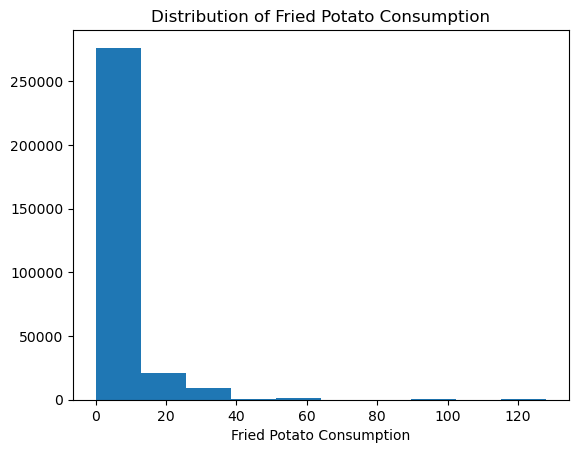

In [142]:
plt.hist(data['FriedPotato_Consumption'])

# Set the title and x-axis label
plt.title("Distribution of Fried Potato Consumption")
plt.xlabel("Fried Potato Consumption")

# Show the plot
plt.show()

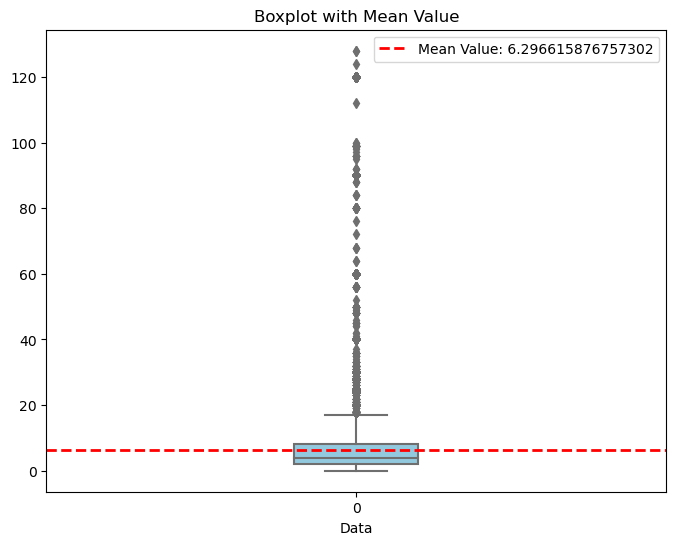

In [144]:
mean = data.FriedPotato_Consumption.mean()
plt.figure(figsize=(8, 6))
sns.boxplot(data=data.FriedPotato_Consumption, width=0.2, color='skyblue')
plt.axhline(y=mean, color='red', linestyle='--', linewidth=2, label=f'Mean Value: {mean}')
plt.legend()
plt.title('Boxplot with Mean Value')
plt.xlabel('Data')
plt.show()

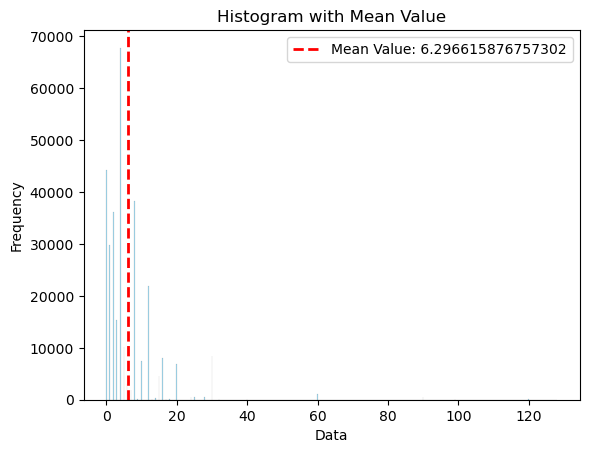

In [152]:
plt.figure()
sns.histplot(data.FriedPotato_Consumption, color='skyblue')
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean Value: {mean}')
plt.legend()
plt.title('Histogram with Mean Value')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.show()

### Question20.	Is there any correlation between BMI and heart disease?

In [27]:
#Replace the string 'Yes' with the value 1
data["Heart_Disease"] = data["Heart_Disease"].apply(lambda x: 1 if x == 'yes' else 0)

#Convert the Heart_Disease column to numerics
data["Heart_Disease"] = data["Heart_Disease"].astype(float)

# Calculate the point-biserial correlation coefficient and p-value
correlation_coefficient, p_value = pointbiserialr(data["BMI"], data["Heart_Disease"])

#Print the results
print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation coefficient: nan
P-value: nan
